# Project overview "Triaging in EDs"
In this section we will introduce the project problem statement and our objectives

Efficient triaging in healthcare, particularly in emergency departments (ED), is vital to ensure timely care and reduce overcrowding. Traditional triage systems often suffer from delays, inconsistencies, and manual errors, impacting both patient outcomes and resource allocation. This project aims to develop an AI-Triage System using machine learning models to automate patient classification into triage levels.<br> Our **primary objectives are:**<br>

To reduce patient waiting times and overcrowding in EDs.<br>
To improve the accuracy and consistency of triage through data-driven decisions.<br>
To compare the performance of machine learning models and select the most effective solution.<br>
**Dataset Overview**<br>
The dataset used in this project is sourced from the Harvard Dataverse and titled "Evaluation of Prognostic Patient Treatment Models with Emphasis on the Three Levels of Triage for an Emergency Severity Index" [. The dataset contains:

2205 records with 67 columns of demographic data (e.g., age, gender), clinical markers (e.g., WBC, Hb), and patient outcomes.
Target variable: Triage Level (categorizing patients based on urgency).

# Milestone I
In Milestone 1, we focused on preparing the dataset for machine learning by performing essential data preprocessing and feature engineering steps integrated into different sections of the workflow. This included handling missing values, cleaning the data, and ensuring consistency throughout. For feature engineering, we applied **scaling** and **standardization** where necessary to adjust numerical feature distributions and make them compatible with various machine learning models. Additionally, **encoding** was implemented to convert categorical variables into numerical formats. These techniques were done, ensuring a well-prepared dataset models development and anlaysis.

## Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# !pip install pyreadstat

## Reading the data and Initial Introduction to the Dataset

In [ ]:
df = pd.read_csv('ED_original_converted.csv')
pd.set_option('display.max_columns', None)
df.head()

,ID,Age,STATUS,WBC,Hb,HCT,PLT,PT,INR,Trp,Neut,Lym,AST,ALT,ALP,LDH,CPK,BS,Na,K,Ur,Cr,Bili,Alb,PH,Pao2,Pco2,Hco3,Gender,GCS,AVPU,SBP,DBP,MAP,pulse,Temp,RR,Fio2,spo2_fio2,mecanical_vent,Read,strok,CHF,Dyspnea,IHD,TOC,CANCER,Icter,AIDS,imunosup,hepatic_failur,lymphoma,Leukemia_myeloma,cirrhosis,Metastas,subject_score,system_ICD10code,EMS_115,Triage_Level,HTN,DM,HLP,COPD,CVA_TIA,Asm,ESRD,LOS
0,1.0,34.0,Dead,5.1,11.2,35.8,185.0,50.0,9.23,NaN,81.5,20.8,1220.0,901.0,389.0,NaN,NaN,116.0,138.0,3.6,13.0,0.5,32.3,2.8,7.48,96.0,26.7,19.8,Female,15.0,A,93.0,67.0,75.67,128.0,36.8,14.0,21.0,457.14,0.0,0.0,0.0,0.0,0.0,0.0,0,No,0.0,0.0,No,Yes,No,No,No,No,50.0,Diseases of the digestive system,No,Level_3,No,No,No,No,No,No,No,7.0
1,2.0,20.0,Alive,17.5,13.4,41.4,222.0,15.3,1.31,NaN,15.3,7.3,147.0,159.0,635.0,NaN,NaN,119.0,137.0,3.8,30.0,0.8,0.8,4.1,7.39,97.0,38.5,23.1,Male,15.0,A,130.0,90.0,103.33,80.0,37.0,16.0,21.0,461.90,0.0,1.0,0.0,0.0,0.0,0.0,0,No,0.0,0.0,No,No,No,No,No,No,20.0,Diseases of the circulatory system,No,Level_3,No,No,No,No,No,No,No,14.0
2,3.0,77.0,Dead,5.2,12.4,37.8,84.0,13.2,1.82,NaN,1.2,11.9,41.0,55.0,44.0,NaN,NaN,94.0,130.0,5.2,92.0,3.0,0.7,2.8,7.30,96.0,32.8,16.2,Female,14.0,A,163.0,105.0,124.33,92.0,36.8,18.0,21.0,457.14,0.0,0.0,0.0,0.0,0.0,0.0,0,No,0.0,0.0,No,No,No,No,No,No,20.0,Certain infectious and parasitic diseases,No,Level_2,Yes,No,No,No,No,No,No,10.0
3,4.0,23.0,Alive,16.2,14.5,43.8,114.0,32.1,1.00,NaN,81.5,17.6,59.0,48.0,173.0,NaN,NaN,155.0,144.0,2.5,42.0,0.7,0.8,3.8,7.44,85.0,26.7,18.3,Female,8.0,U,100.0,60.0,73.33,100.0,37.0,12.0,100.0,85.00,1.0,0.0,0.0,0.0,0.0,0.0,0,No,0.0,0.0,No,No,No,No,No,No,60.0,Diseases of the respiratory system,No,Level_3,No,No,No,No,No,No,No,19.0
4,5.0,86.0,Alive,15.8,12.2,35.7,266.0,13.0,1.00,NaN,1.0,13.7,25.0,19.0,203.0,NaN,NaN,220.0,115.0,3.7,48.0,1.4,1.2,3.6,7.45,92.0,34.1,23.6,Female,15.0,A,150.0,90.0,110.00,85.0,37.0,19.0,21.0,438.10,0.0,1.0,0.0,0.0,0.0,0.0,0,No,0.0,0.0,No,No,No,No,No,No,30.0,"Symptoms, signs and abnormal clinical and labo...",Yes,Level_3,No,No,No,No,No,No,No,2.0


## Displaying the number of features and number of records in the dataset

In [ ]:
print("Number of Features:", len(df.columns))
print("Number of records (rows):", len(df))

Number of Features: 67
Number of records (rows): 2205


## Displying all columns in the dataset

In [ ]:
print(df.columns)

Index(['ID', 'Age', 'STATUS', 'WBC', 'Hb', 'HCT', 'PLT', 'PT', 'INR', 'Trp',
       'Neut', 'Lym', 'AST', 'ALT', 'ALP', 'LDH', 'CPK', 'BS', 'Na', 'K', 'Ur',
       'Cr', 'Bili', 'Alb', 'PH', 'Pao2', 'Pco2', 'Hco3', 'Gender', 'GCS',
       'AVPU', 'SBP', 'DBP', 'MAP', 'pulse', 'Temp', 'RR', 'Fio2', 'spo2_fio2',
       'mecanical_vent', 'Read', 'strok', 'CHF', 'Dyspnea', 'IHD', 'TOC',
       'CANCER', 'Icter', 'AIDS', 'imunosup', 'hepatic_failur', 'lymphoma',
       'Leukemia_myeloma', 'cirrhosis', 'Metastas', 'subject_score',
       'system_ICD10code', 'EMS_115', 'Triage_Level', 'HTN', 'DM', 'HLP',
       'COPD', 'CVA_TIA', 'Asm', 'ESRD', 'LOS'],
      dtype='object')


## Short description for each feature in the dataset


**Note: check the output of the code cell.**

In [ ]:
# Assigned a clear and meaningful description to each column in the dataset
# to improve understanding of the data and its features.
featurewithDesc = [
    ("ID", "Unique identifier for each record in the dataset."),
    ("Age", "Age of the patient in years."),
    ("STATUS", "Status or outcome of the patient (e.g., discharged, admitted, deceased)."),
    ("WBC", "White Blood Cell count, typically measured in cells per microliter (indicator of infection/inflammation)."),
    ("Hb", "Hemoglobin level, indicating oxygen-carrying capacity of the blood."),
    ("HCT", "Hematocrit, the proportion of red blood cells in the blood."),
    ("PLT", "Platelet count, indicating blood clotting ability."),
    ("PT", "Prothrombin time, a measure of blood clotting time."),
    ("INR", "International Normalized Ratio, a standardized measure of blood clotting."),
    ("Trp", "Troponin level, often used to assess heart damage."),
    ("Neut", "Neutrophil count, a type of white blood cell associated with infection."),
    ("Lym", "Lymphocyte count, another type of white blood cell."),
    ("AST", "Aspartate Aminotransferase, a liver enzyme."),
    ("ALT", "Alanine Aminotransferase, another liver enzyme."),
    ("ALP", "Alkaline Phosphatase, a marker for liver or bone disease."),
    ("LDH", "Lactate Dehydrogenase, an enzyme released during tissue damage."),
    ("CPK", "Creatine Phosphokinase, a marker for muscle or heart injury."),
    ("BS", "Blood Sugar or Blood Glucose level."),
    ("Na", "Sodium level in blood."),
    ("K", "Potassium level in blood."),
    ("Ur", "Urea level in blood, a measure of kidney function."),
    ("Cr", "Creatinine level in blood, another kidney function marker."),
    ("Bili", "Bilirubin level, indicating liver function or hemolysis."),
    ("Alb", "Albumin level, a marker of liver function and nutritional status."),
    ("PH", "Blood pH, measuring acidity or alkalinity."),
    ("Pao2", "Partial pressure of oxygen in arterial blood, assessing oxygenation."),
    ("Pco2", "Partial pressure of carbon dioxide in arterial blood, assessing ventilation."),
    ("Hco3", "Bicarbonate level, important for acid-base balance."),
    ("Gender", "Gender of the patient (e.g., Male, Female)."),
    ("GCS", "Glasgow Coma Scale, assessing level of consciousness."),
    ("AVPU", "Alert, Voice, Pain, Unresponsive - a quick measure of responsiveness."),
    ("SBP", "Systolic Blood Pressure, the top number in a blood pressure reading."),
    ("DBP", "Diastolic Blood Pressure, the bottom number in a blood pressure reading."),
    ("MAP", "Mean Arterial Pressure, an average blood pressure value."),
    ("pulse", "Heart rate in beats per minute."),
    ("Temp", "Body temperature, typically in Celsius or Fahrenheit."),
    ("RR", "Respiratory Rate, the number of breaths per minute."),
    ("Fio2", "Fraction of Inspired Oxygen, the concentration of oxygen in the air mixture delivered."),
    ("spo2_fio2", "Ratio of oxygen saturation (SpO2) to FiO2, an indicator of respiratory function."),
    ("mechanical_vent", "Whether the patient is on mechanical ventilation (0 = No, 1 = Yes)."),
    ("Read", "Possibly refers to readmission status or frequency."),
    ("strok", "History of stroke or presence of stroke-related conditions."),
    ("CHF", "Congestive Heart Failure status (0 = No, 1 = Yes)."),
    ("Dyspnea", "Presence of shortness of breath (0 = No, 1 = Yes)."),
    ("IHD", "Ischemic Heart Disease status (0 = No, 1 = Yes)."),
    ("TOC", "Type of care or treatment (e.g., Intensive Care, Regular)."),
    ("CANCER", "Presence of cancer (0 = No, 1 = Yes)."),
    ("Icter", "Icterus or jaundice status (0 = No, 1 = Yes)."),
    ("AIDS", "Acquired Immunodeficiency Syndrome status (0 = No, 1 = Yes)."),
    ("imunosup", "Immunosuppression status (0 = No, 1 = Yes)."),
    ("hepatic_failur", "Hepatic (liver) failure status (0 = No, 1 = Yes)."),
    ("lymphoma", "Presence of lymphoma (0 = No, 1 = Yes)."),
    ("Leukemia_myeloma", "Presence of leukemia or multiple myeloma (0 = No, 1 = Yes)."),
    ("cirrhosis", "Presence of liver cirrhosis (0 = No, 1 = Yes)."),
    ("Metastas", "Metastasis status (0 = No, 1 = Yes), indicating spread of cancer."),
    ("subject_score", "A clinical score or severity measure for the subject."),
    ("system_ICD10code", "International Classification of Diseases (ICD-10) code for diagnosis."),
    ("EMS_115", "Emergency Medical Service (likely indicating EMS use or referral)."),
    ("Triage_Level", "Triage level assigned to the patient, indicating priority for care."),
    ("HTN", "Hypertension status (0 = No, 1 = Yes)."),
    ("DM", "Diabetes Mellitus status (0 = No, 1 = Yes)."),
    ("HLP", "Hyperlipidemia status (0 = No, 1 = Yes)."),
    ("COPD", "Chronic Obstructive Pulmonary Disease status (0 = No, 1 = Yes)."),
    ("CVA_TIA", "Cerebrovascular Accident (stroke) or Transient Ischemic Attack status (0 = No, 1 = Yes)."),
    ("Asm", "Asthma status (0 = No, 1 = Yes)."),
    ("ESRD", "End-Stage Renal Disease status (0 = No, 1 = Yes)."),
    ("LOS", "Length of Stay in hospital (measured in days).")
]

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df_features = pd.DataFrame(featurewithDesc, columns=["Feature", "Description"])
df_features


,Feature,Description
0,ID,Unique identifier for each record in the dataset.
1,Age,Age of the patient in years.
2,STATUS,"Status or outcome of the patient (e.g., discharged, admitted, deceased)."
3,WBC,"White Blood Cell count, typically measured in cells per microliter (indicator of infection/inflammation)."
4,Hb,"Hemoglobin level, indicating oxygen-carrying capacity of the blood."
5,HCT,"Hematocrit, the proportion of red blood cells in the blood."
6,PLT,"Platelet count, indicating blood clotting ability."
7,PT,"Prothrombin time, a measure of blood clotting time."
8,INR,"International Normalized Ratio, a standardized measure of blood clotting."
9,Trp,"Troponin level, often used to assess heart damage."


## Exploratory Data Analysis (EDA)



Exploratory Data Analysis (EDA) is a crucial initial step in any data analysis or machine learning project. The primary goal of EDA is to understand the structure, quality, and potential patterns within the dataset. By employing EDA, data scientists and analysts uncover insights, highlight significant variables, and expose underlying relationships that inform further analysis and model development.

#### EDA Roadmap
In an EDA section, we will proceed through the following:


*   Data Inspection: Overview of data types, null values, and overall shape.
*   Summary Statistics: Calculating key statistics and identifying variable distributions.


*   Exploring Variables and Their Relationships: Employing visual tools (e.g., histograms, box plots, pair plots) to explore individual variables and relationships.
*   Handling missing data and data quality issues: Addressing missing values, outliers, and inconsistencies.


*  Identifying Relationships: Using correlation matrices and scatter plots to examine interactions.
*  Hypothesis Formulation: Generating new features or hypotheses based on EDA findings.

EDA not only prepares the data for model building but also helps refine problem understanding and aligns analytical goals with the dataset's inherent structure and properties.







### Data Inspection
This section shows the different data types in the dataset, missing values, and the shape of the dataset.
</br>The following code cell shows the data type of each feature

**Datatypes:**<br>
int64: Represents integer values (whole numbers).<br>
float64: Represents decimal or floating-point numbers.<br>
object: Represents text or mixed types (e.g., strings).

In [ ]:
#In order to understand the dataset, this code will print each col with correspnding data type.
df.dtypes

,0
ID,float64
Age,float64
STATUS,object
WBC,float64
Hb,float64
HCT,float64
PLT,float64
PT,float64
INR,float64
Trp,float64


### Checking Missing Values
As illustrated below, most of the missing values are concentrated in specific features. This can mean that these features may be irrelavant in most cases, may be optional data, or other reasons.

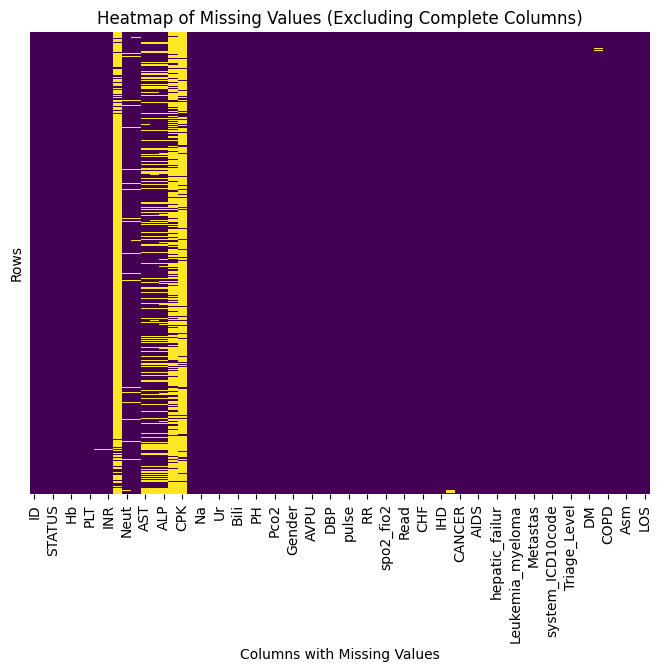

In [ ]:
missing_data_total = df.isna().sum().sum()#total missing values.
missing_data_by_column = df.isna().sum()#missing per col.


plt.figure(figsize=(8, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values (Excluding Complete Columns)')
plt.xlabel('Columns with Missing Values')
plt.ylabel('Rows')
plt.show()

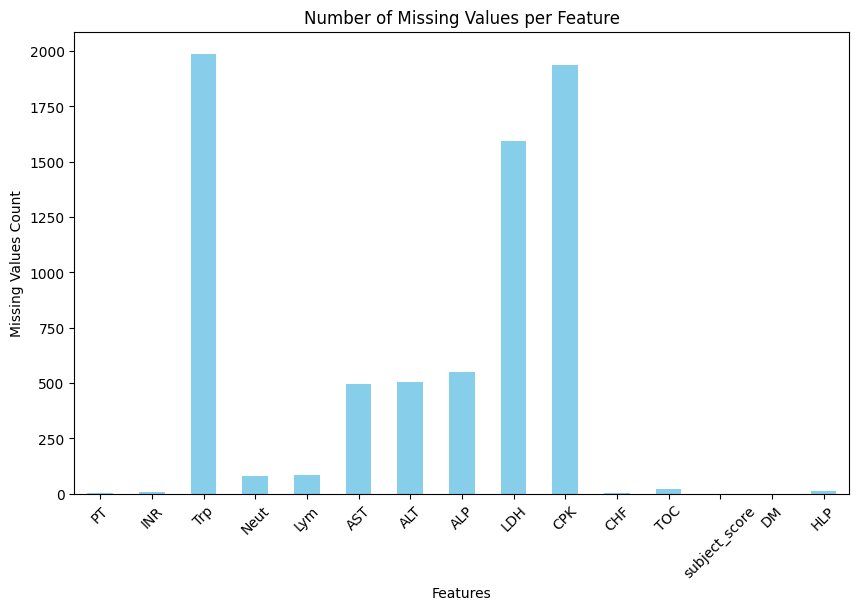

In [ ]:
missing_data_by_column = missing_data_by_column[missing_data_by_column > 0]
plt.figure(figsize=(10, 6))
missing_data_by_column.plot(kind='bar', color='skyblue')
plt.title("Number of Missing Values per Feature")
plt.xlabel("Features")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
missing_data_by_column = df.isna().sum()
print(f"Total dataset records: {len(df)}")
print(f"Total Missing Data: {missing_data_total}")
print(f"Missing Data by Column:\n{missing_data_by_column}")

Total dataset records: 2205
Total Missing Data: 7287
Missing Data by Column:
ID                     0
Age                    0
STATUS                 0
WBC                    0
Hb                     0
HCT                    0
PLT                    0
PT                     5
INR                    6
Trp                 1988
Neut                  80
Lym                   84
AST                  498
ALT                  507
ALP                  551
LDH                 1593
CPK                 1937
BS                     0
Na                     0
K                      0
Ur                     0
Cr                     0
Bili                   0
Alb                    0
PH                     0
Pao2                   0
Pco2                   0
Hco3                   0
Gender                 0
GCS                    0
AVPU                   0
SBP                    0
DBP                    0
MAP                    0
pulse                  0
Temp                   0
RR                     

### Displaying the shape of the dataset
The dataset consists of **2205 records** and **67 features**. It includes a mix of numerical and categorical variables, as shown in a previous cell illustrating features' data types, which will require different handling methods during analysis.


In [ ]:
df.shape

(2205, 67)

### Describing the Dataset Statistics
The following code cell shows statistics for the numerical features in the dataset.



In [ ]:
df.describe()

,ID,Age,WBC,Hb,HCT,PLT,PT,INR,Trp,Neut,Lym,AST,ALT,ALP,LDH,CPK,BS,Na,K,Ur,Cr,Bili,Alb,PH,Pao2,Pco2,Hco3,GCS,SBP,DBP,MAP,pulse,Temp,RR,Fio2,spo2_fio2,mecanical_vent,Read,strok,CHF,Dyspnea,IHD,Icter,AIDS,subject_score,LOS
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2200.000000,2199.000000,217.000000,2125.000000,2121.000000,1707.000000,1698.000000,1654.000000,612.000000,268.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2202.000000,2205.000000,2205.000000,2205.000000,2205.000000,2204.000000,2205.000000
mean,1154.987755,61.829478,11.895751,12.039075,34.761134,222.97161,19.243314,1.558440,0.266452,73.316414,16.018364,105.728407,103.054694,462.512134,807.065098,648.889552,151.776009,136.509524,4.343379,75.548676,2.047937,2.141823,3.541361,7.362490,93.283447,39.144036,22.136916,14.419501,126.736961,77.481179,93.895460,94.458050,37.251202,20.258730,25.041270,404.749615,0.056236,0.401814,0.011338,0.024523,0.009070,0.018141,0.051701,0.024490,25.874773,8.003175
std,677.167364,18.485363,13.817879,10.821097,8.840454,133.19980,42.233858,1.988711,0.771640,26.486884,13.877870,415.841996,326.808396,697.235779,1427.949354,2050.937464,100.845751,6.677963,0.948068,69.346736,2.384864,4.687246,0.586984,0.101555,5.605685,13.714728,6.484614,1.378300,27.274512,16.683757,19.015978,20.152925,0.803827,5.747983,10.240467,88.715804,0.230429,0.490376,0.105898,0.154702,0.094827,0.260248,0.221472,0.154599,18.317662,8.375949
min,1.000000,18.000000,0.100000,1.600000,7.200000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.570000,0.040000,2.200000,40.000000,104.000000,1.500000,5.000000,0.100000,0.000000,1.200000,6.550000,65.000000,5.300000,1.600000,3.000000,55.000000,30.000000,39.330000,40.000000,35.000000,12.000000,21.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,577.000000,50.000000,6.700000,9.600000,29.300000,137.00000,12.000000,1.000000,0.000000,66.400000,7.100000,18.000000,15.000000,190.250000,351.000000,55.750000,99.000000,133.000000,3.700000,31.000000,0.900000,0.600000,3.300000,7.330000,93.000000,31.500000,18.300000,15.000000,110.000000,70.000000,82.330000,80.000000,37.000000,17.000000,21.000000,404.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000
50%,1135.000000,64.000000,9.800000,11.700000,35.600000,210.00000,13.120000,1.200000,0.000000,78.700000,13.100000,30.000000,26.000000,269.000000,474.000000,118.500000,119.000000,137.000000,4.200000,51.000000,1.200000,1.000000,3.700000,7.380000,95.000000,37.500000,22.500000,15.000000,125.000000,78.000000,93.330000,90.000000,37.000000,18.000000,21.000000,452.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,6.000000
75%,1703.000000,77.000000,13.700000,13.400000,40.400000,286.00000,16.500000,1.430000,0.190000,87.000000,21.900000,70.000000,67.750000,446.500000,720.250000,343.000000,164.000000,140.000000,4.800000,93.000000,2.000000,1.400000,4.000000,7.420000,96.000000,43.500000,25.800000,15.000000,140.000000,87.000000,103.330000,107.000000,37.500000,21.000000,21.000000,452.380000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,10.000000
max,2384.000000,98.000000,267.900000,300.000000,63.600000,961.00000,1212.300000,68.000000,8.900000,391.000000,278.000000,11865.000000,4640.000000,13014.000000,25134.000000,16949.000000,1328.000000,176.000000,8.500000,672.000000,25.800000,51.000000,6.300000,7.680000,100.000000,131.600000,70.100000,15.000000,250.000000,173.000000,185.000000,170.000000,41.700000,50.000000,100.000000,476.190000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,95.000000,98.000000


### This diagram illustrates the distribution of key numerical features in the dataset.
with mean (red) and median (green) lines to highlight central tendencies.

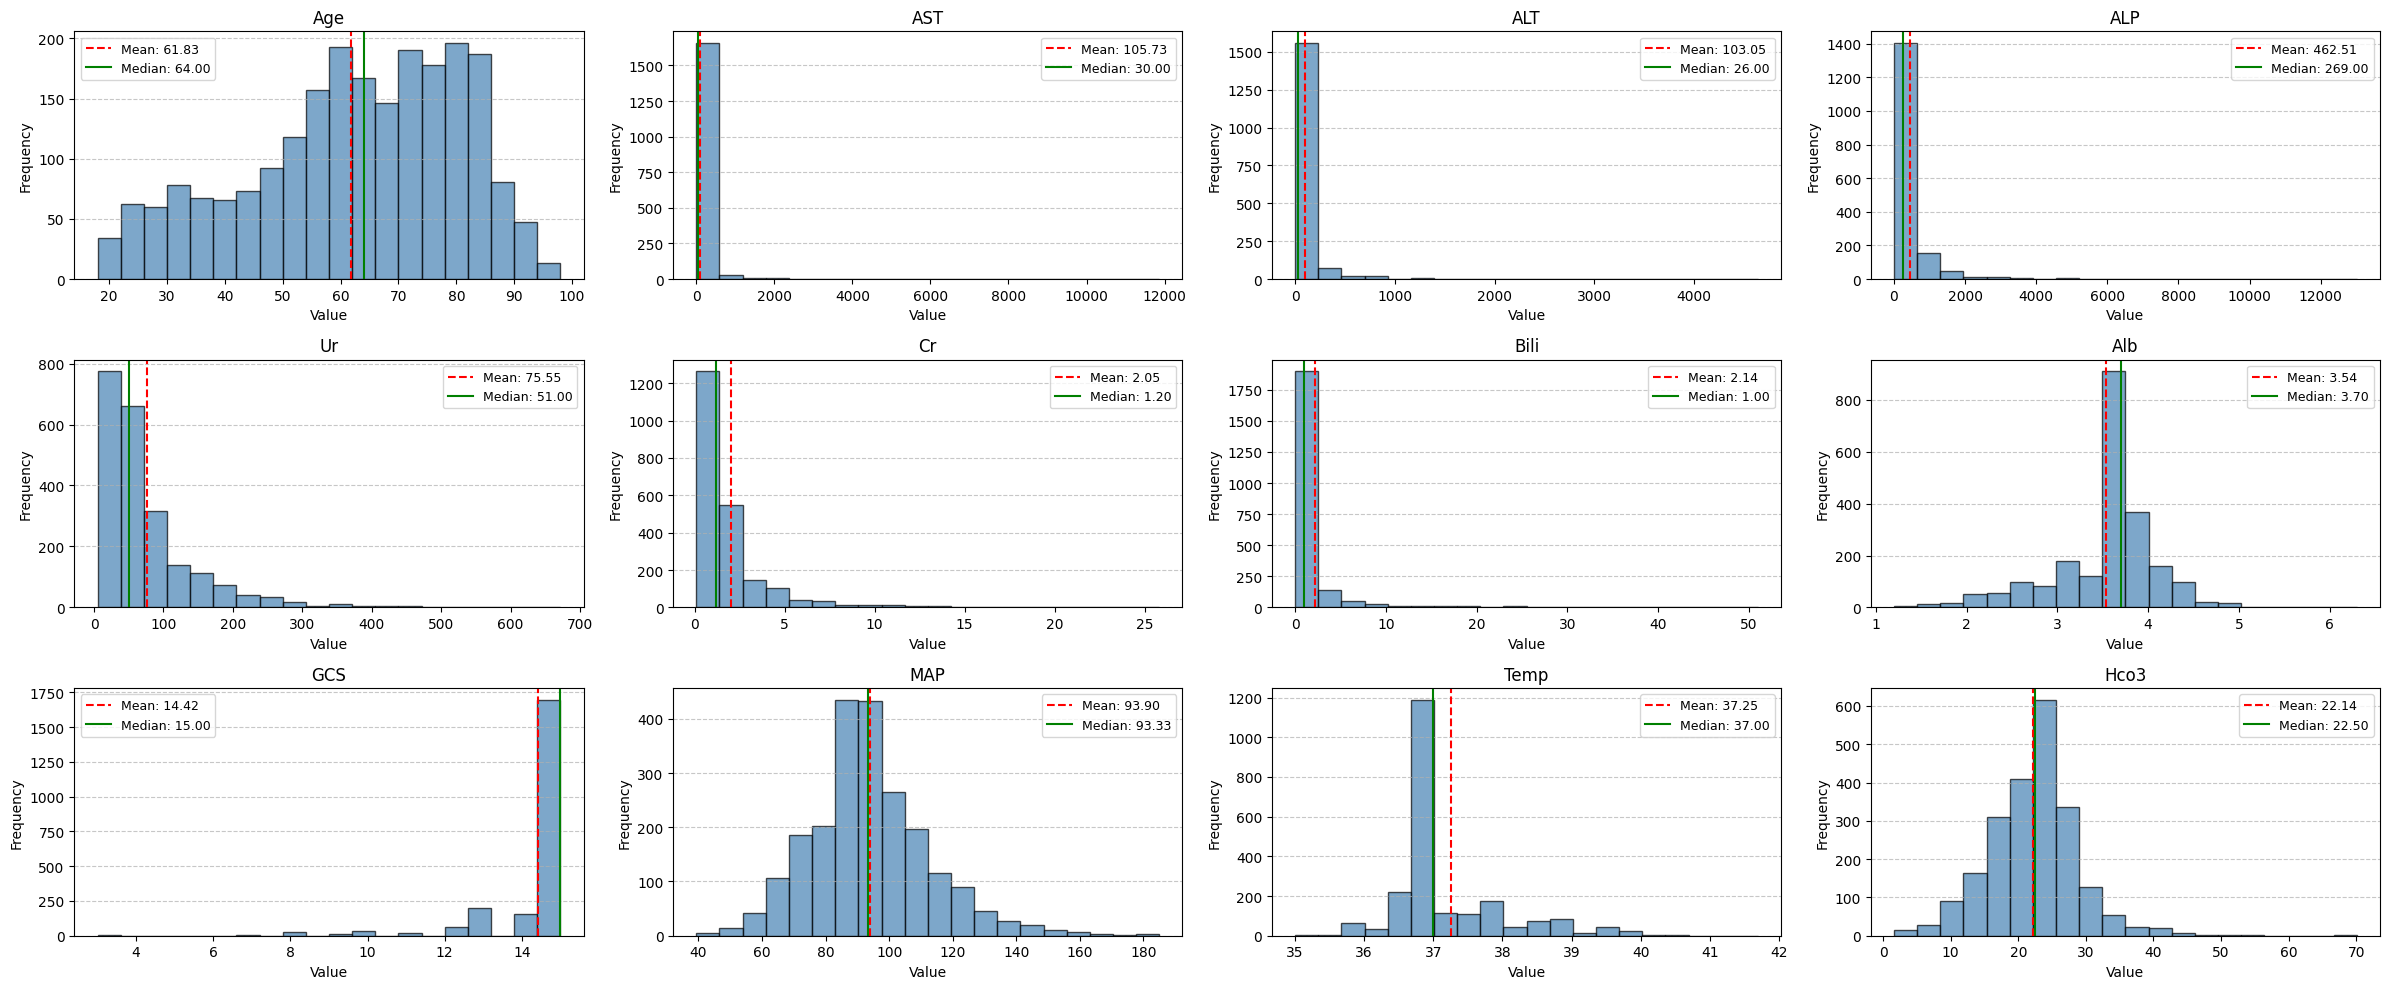

In [ ]:
key_features = ['Age','AST', 'ALT', 'ALP', 'Ur', 'Cr', 'Bili', 'Alb', 'GCS', 'MAP', 'Pulse', 'Temp', 'Hco3']

key_features = [feature for feature in key_features if feature in df.columns]

n_cols = 4
n_rows = (len(key_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 10))
axes = axes.flatten()

for i, column in enumerate(key_features):
    axes[i].hist(df[column].dropna(), bins=20, edgecolor='k', alpha=0.7, color='steelblue')

    mean_val = df[column].mean()
    median_val = df[column].median()

    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')

    axes[i].set_title(column, fontsize=12)
    axes[i].set_xlabel("Value", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].legend(fontsize=9)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


**Observations from Descriptive Statistics**:

- The mean age of patients is approximately 62 years, with a range from 1 to 98 years, indicating a diverse age distribution.
- **PLT** (platelet count) has a max value of 961, which is unusually high and could be an outlier worth investigating further.
- **Missing Data**: `INR`, `Trp`, and `Neut` have fewer records compared to other features, suggesting missing values that may require imputation or further investigation.

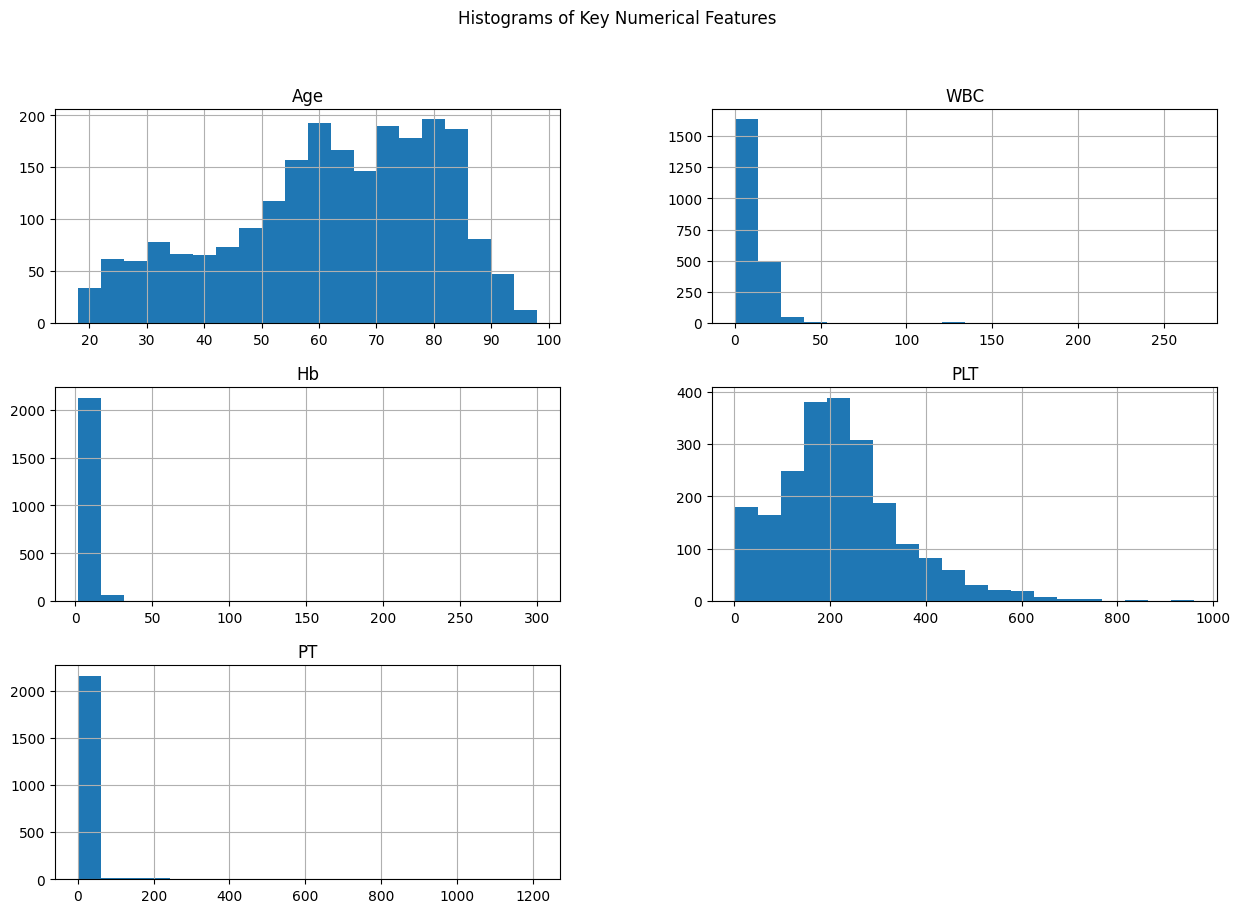

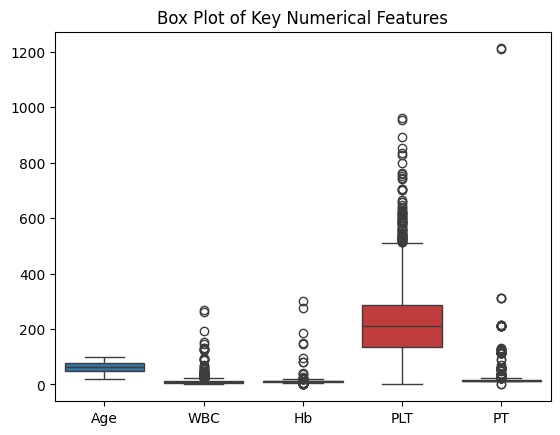

In [ ]:
numerical_cols = ['Age', 'WBC', 'Hb', 'PLT', 'PT']
df[numerical_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Key Numerical Features")
plt.show()

sns.boxplot(data=df[numerical_cols])
plt.title("Box Plot of Key Numerical Features")
plt.show()


### Frequency Distribution for Categorical Features:
The following code cell shows bar charts for each categorical feature, showing the count for each value. As illustrated below, a lot of those features show significant imbalance, which needs to be dealt with for maintaining the quality of the data.

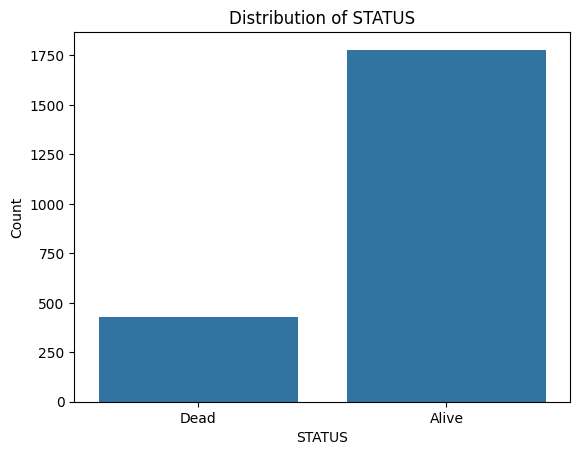

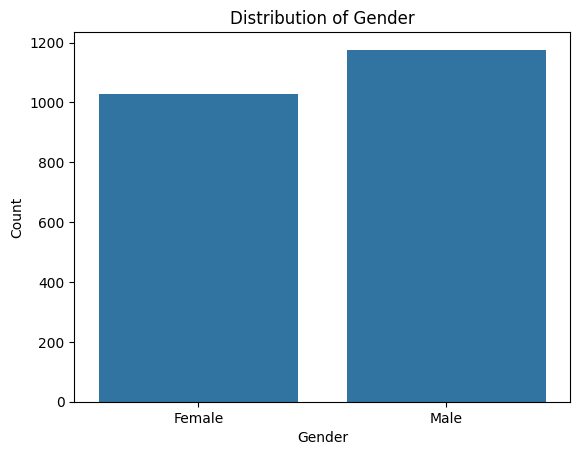

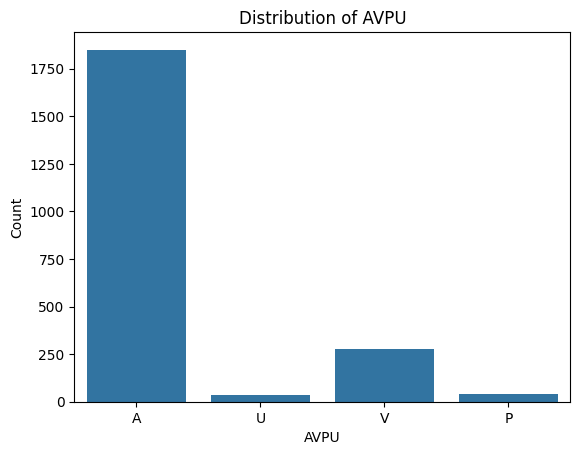

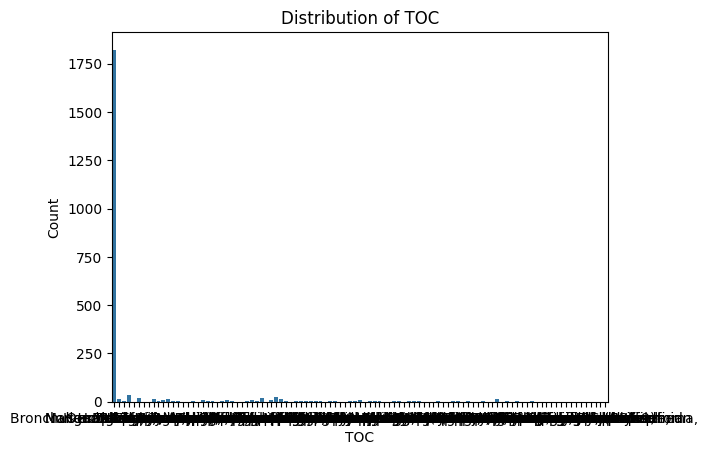

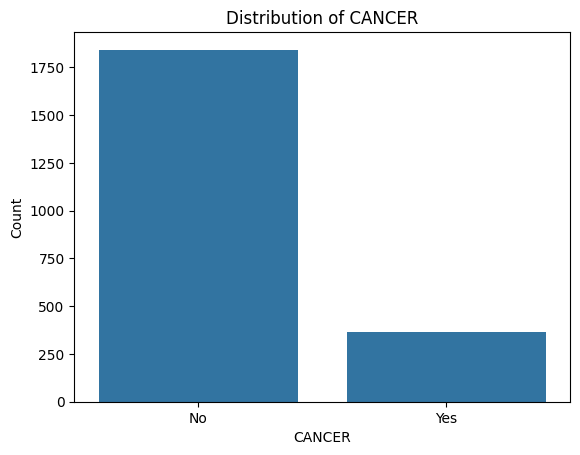

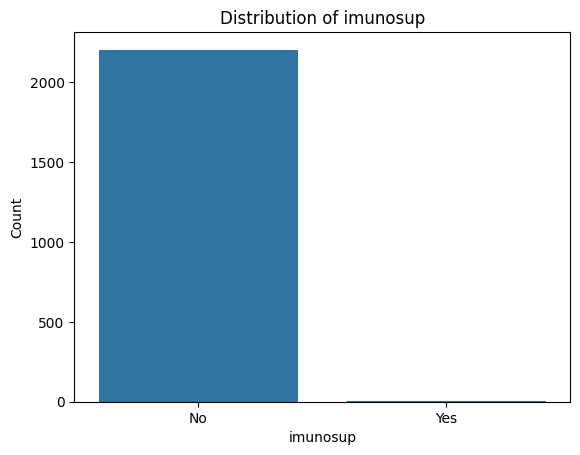

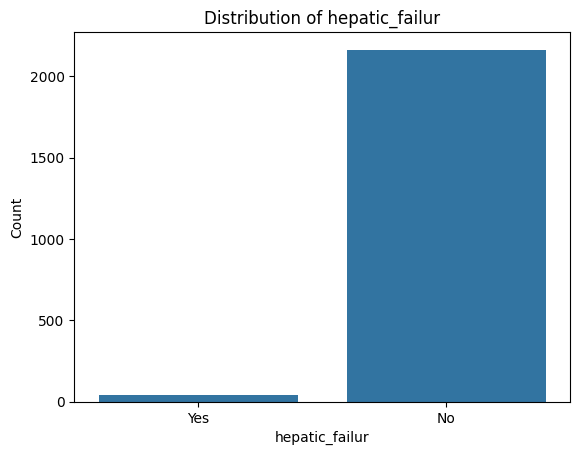

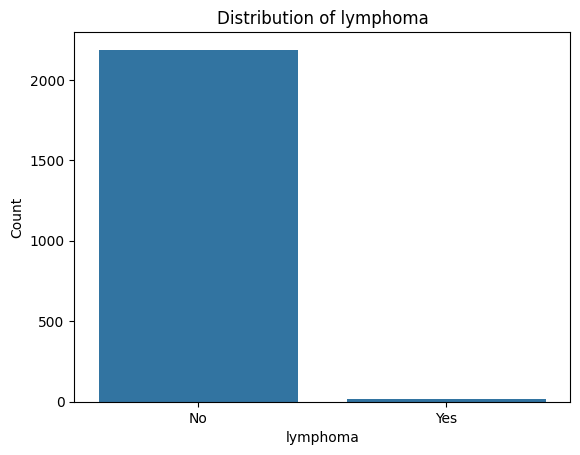

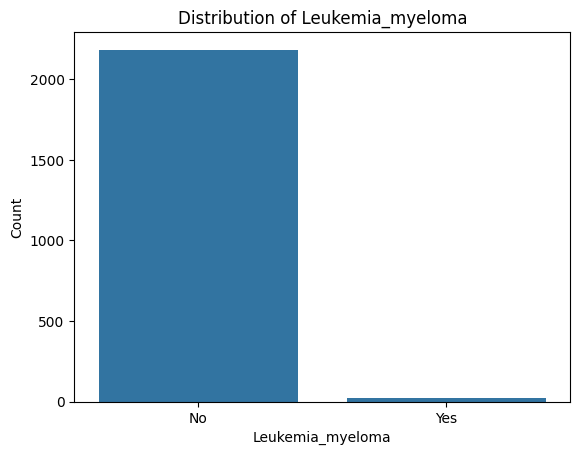

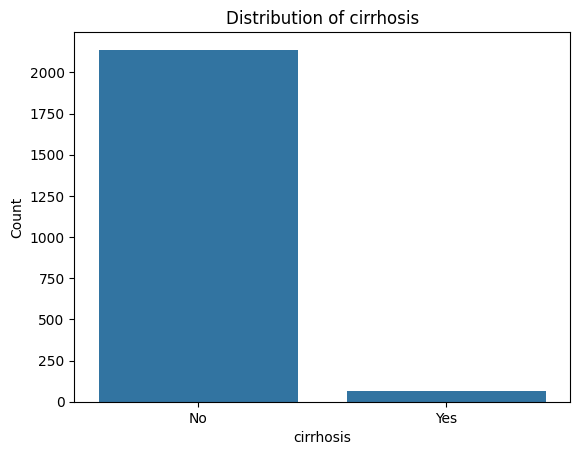

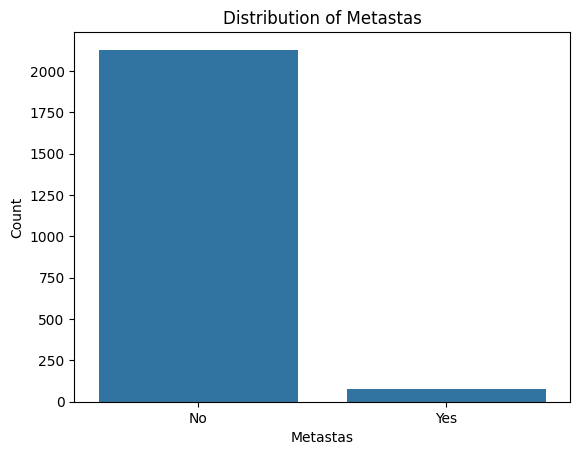

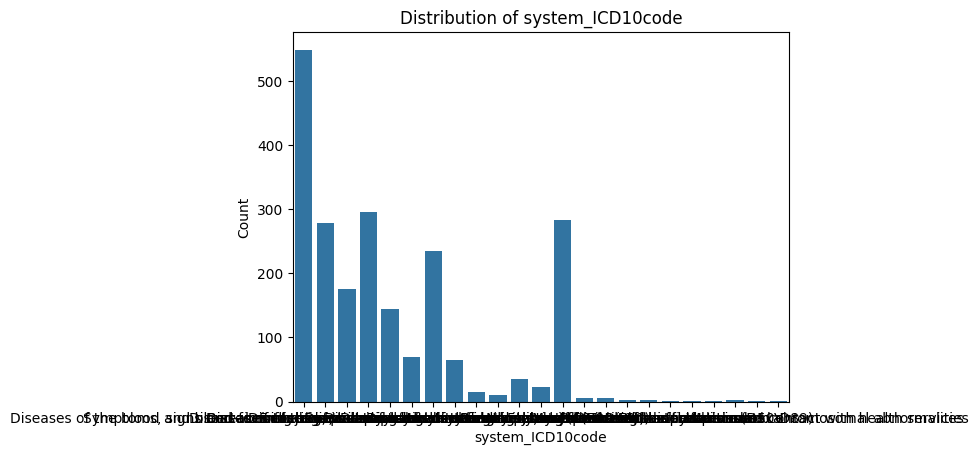

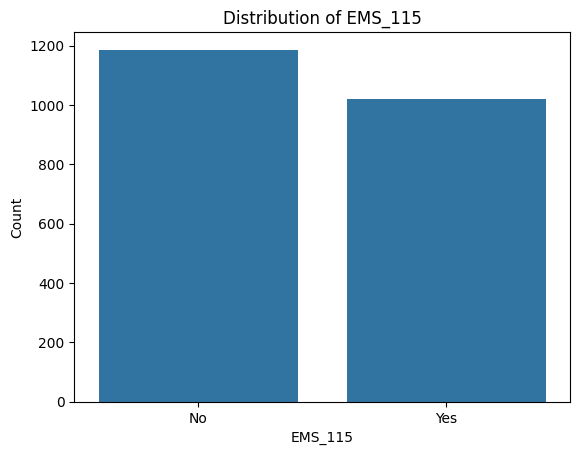

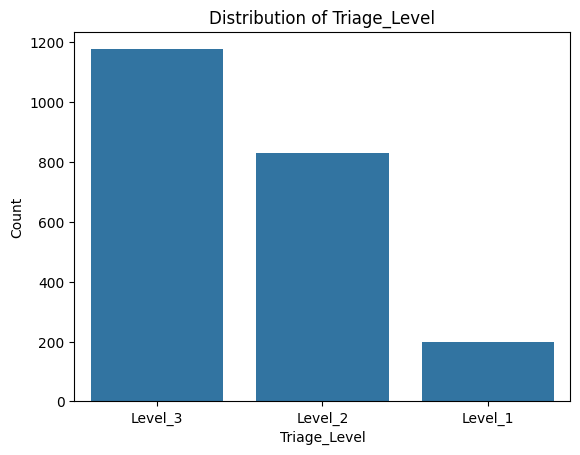

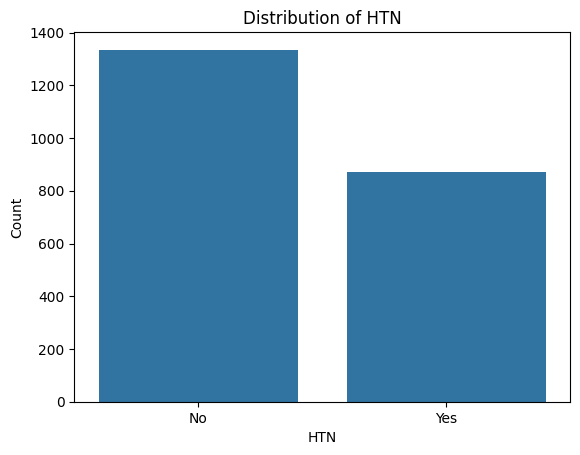

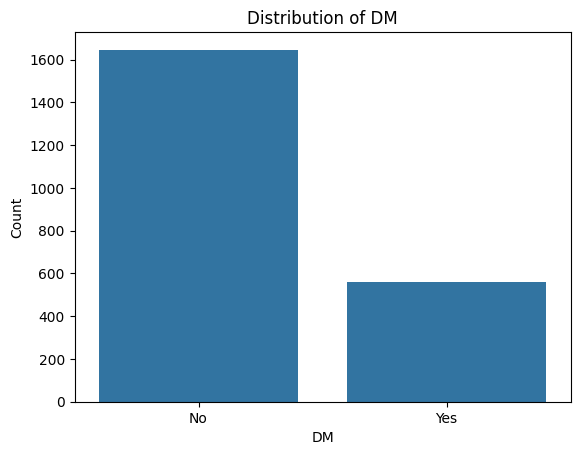

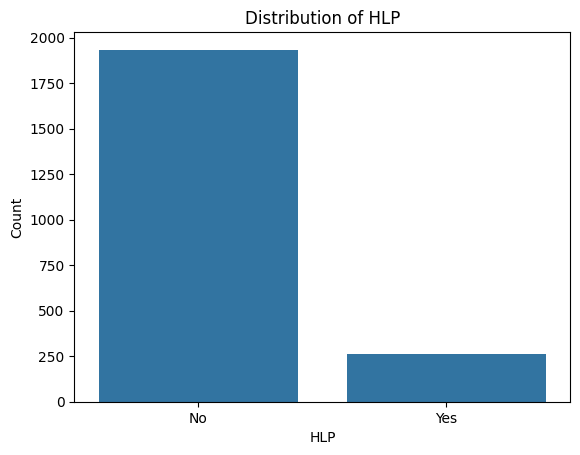

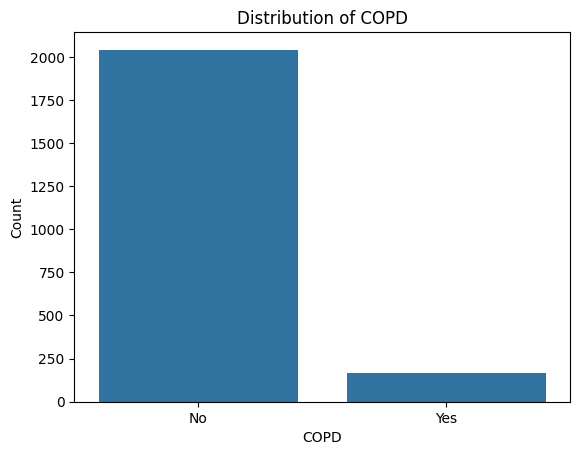

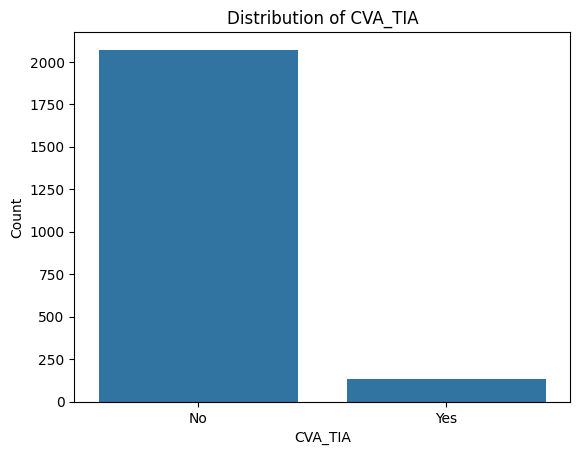

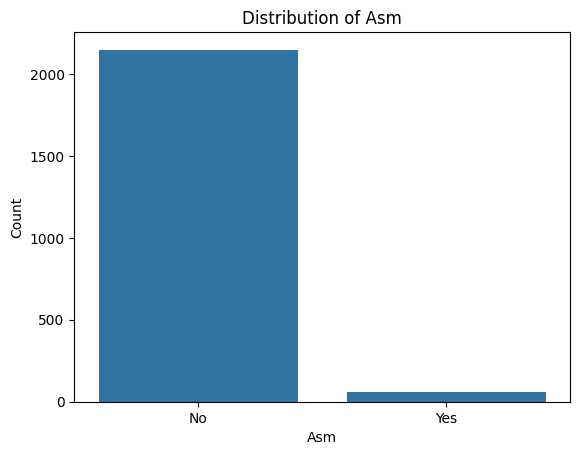

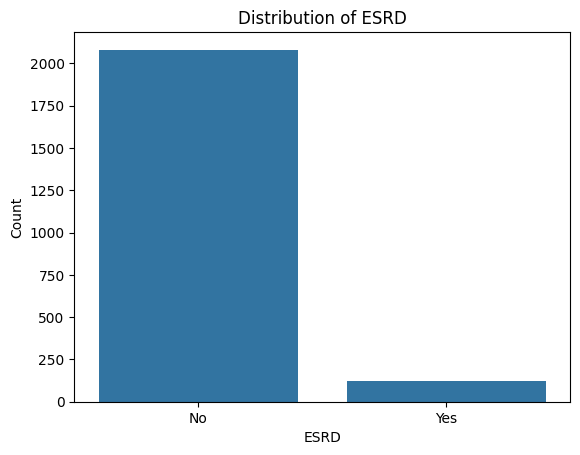

In [ ]:
categorical_cols = [x for x in df.columns if x not in df.select_dtypes(include=['float64', 'int64']).columns]

for col in categorical_cols:

  sns.countplot(data=df, x=col)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()


## Handling missing data and data quality issues

#### Dropping Features with Many Missing Values
In this analysis, we decided to drop features with more than 70% missing values, as imputing values for these features would likely introduce noise and reduce the model's interpretability. The features `Trp`, `CPK`, and `LDH` all exceed this threshold.

In [ ]:
print(f"Trp: {(df['Trp'].isna().sum() / len(df))} missing values")
print(f"CPK: {(df['CPK'].isna().sum() / len(df))} missing values")
print(f"LDH: {(df['LDH'].isna().sum() / len(df))} missing values")

df.drop(columns=['Trp', 'CPK', 'LDH'], inplace=True)

Trp: 0.9015873015873016 missing values
CPK: 0.8784580498866214 missing values
LDH: 0.7224489795918367 missing values


### Imputing Other Features with Missing Values
Other features that do not have many missing values can be imputed with statistical values. Numerical features can be imputed with the mean of the feature, while categorical features can be imputed with the mode of the feature.

## Checking Features' Values

In [ ]:
df['Neut'].unique()

array([ 81.5 ,  15.3 ,   1.2 ,   1.  ,  15.1 ,  15.7 ,  17.1 ,  11.2 ,
        50.  ,  81.3 ,  77.4 ,  89.8 ,  89.  ,  17.2 ,  23.1 ,   1.9 ,
        22.8 ,  60.  ,  75.9 ,  82.1 ,  68.7 ,  79.9 ,  36.4 ,  41.5 ,
        87.1 ,  56.9 ,  84.  ,  59.5 ,  75.1 ,  90.3 ,  89.7 ,  77.5 ,
        97.3 ,  81.  ,  62.5 ,  96.3 ,  76.8 ,  89.6 ,  84.4 ,  78.6 ,
        91.2 ,  85.9 ,  87.6 ,  66.6 ,  66.7 ,  63.8 ,  94.5 ,  80.5 ,
        94.  ,  46.  ,  75.5 ,  71.1 ,  65.1 ,  86.6 ,  95.8 ,  69.9 ,
        81.8 ,  78.  ,   0.  ,  95.  ,  42.3 ,  58.8 ,  84.6 ,  87.9 ,
        88.8 ,  71.7 ,  75.8 ,  63.9 ,  83.8 ,    nan,  82.4 ,  24.  ,
        82.8 ,  97.  ,  62.  ,  42.1 ,  94.9 ,  86.2 ,  97.1 ,  61.  ,
        45.5 ,  84.2 ,  86.1 ,  63.4 ,  83.7 ,  91.4 ,  46.1 ,  74.9 ,
        80.3 ,  92.6 ,  79.6 ,  82.  ,  77.2 ,  78.1 ,  73.1 ,  91.3 ,
        85.4 ,  55.8 ,  74.3 ,  62.1 ,  90.  ,  61.9 ,  63.  ,  83.1 ,
        86.9 ,  90.4 ,  79.4 ,  65.7 ,  61.2 ,  76.6 ,  85.1 ,  91.9 ,
      

In [ ]:
df['Lym'].unique()

array([ 20.8 ,   7.3 ,  11.9 ,  17.6 ,  13.7 ,  47.6 ,  29.5 ,  43.  ,
         7.5 ,  12.2 ,  29.6 ,   8.6 ,  13.2 ,   0.  ,   6.9 ,    nan,
         2.  ,   1.3 ,   2.4 ,   9.1 ,  14.9 ,   6.2 ,  21.6 ,  33.  ,
         1.5 ,  12.5 ,  32.1 ,   2.3 ,  14.  ,  18.1 ,  12.7 ,  12.3 ,
        15.7 ,  16.8 ,  22.1 ,  25.2 ,  20.5 ,  29.1 ,  12.8 ,  34.7 ,
         3.7 ,  12.9 ,   3.5 ,   8.3 ,   8.4 ,   5.2 ,  17.8 ,  31.3 ,
        15.9 ,   8.7 ,   9.7 ,  19.8 ,   8.1 ,  16.4 ,   6.  ,   5.3 ,
        41.6 ,  40.1 ,  23.8 ,  12.  ,   8.9 ,   6.4 ,  13.8 ,  24.4 ,
        14.1 ,  16.  ,   4.3 ,  22.9 ,  38.4 ,  31.5 ,  14.3 ,   9.4 ,
        23.5 ,  22.8 ,  26.9 ,   9.9 ,  11.6 ,  52.6 ,   7.8 ,   1.8 ,
        28.  ,  47.  ,  11.1 ,   4.2 ,  37.1 ,  38.5 ,  11.  ,  11.7 ,
        13.  ,   4.7 ,  13.6 ,   5.  ,  38.2 ,   9.3 ,  18.4 ,  10.9 ,
        13.3 ,  17.9 ,  16.1 ,  15.5 ,  18.3 ,   7.4 ,  30.1 ,  39.  ,
        20.2 ,  28.4 ,  30.  ,   8.  ,  17.1 ,  29.8 ,   1.7 ,  20.9 ,
      

In [ ]:
df['AST'].unique()

array([1.2200e+03, 1.4700e+02, 4.1000e+01, 5.9000e+01, 2.5000e+01,
              nan, 1.1000e+01, 2.7000e+01, 9.7000e+01, 4.9000e+01,
       5.4000e+01, 4.6000e+01, 1.7000e+01, 2.0120e+03, 5.0000e+01,
       2.6000e+01, 1.9200e+02, 1.6900e+02, 1.3000e+01, 1.4200e+02,
       1.2000e+01, 2.0000e+01, 4.3000e+01, 3.6000e+01, 5.5000e+01,
       1.7200e+02, 4.7000e+01, 2.2000e+01, 8.3000e+01, 1.5000e+01,
       8.0000e+00, 1.0100e+02, 9.0000e+00, 1.9000e+01, 4.0000e+01,
       5.5900e+02, 2.8000e+01, 6.2000e+01, 1.0000e+01, 8.6000e+01,
       3.0000e+01, 3.9000e+01, 2.4000e+01, 1.4000e+02, 2.9000e+01,
       7.2000e+01, 2.3000e+01, 3.5000e+01, 4.2000e+01, 7.1100e+02,
       5.1000e+01, 1.4000e+01, 3.3000e+01, 6.0000e+01, 2.1000e+01,
       7.6000e+01, 3.2000e+01, 8.1000e+01, 2.3040e+03, 1.8200e+02,
       1.0400e+02, 3.6500e+02, 3.1000e+01, 8.9000e+01, 1.0700e+02,
       3.8000e+01, 8.0000e+01, 5.6000e+01, 1.0600e+02, 6.3000e+01,
       5.4100e+02, 1.5100e+02, 8.8400e+02, 2.9200e+02, 1.1200e

In [ ]:
df['ALT'].unique()

array([9.010e+02, 1.590e+02, 5.500e+01, 4.800e+01, 1.900e+01,       nan,
       7.000e+00, 3.400e+01, 1.100e+02, 3.900e+01, 3.500e+01, 1.080e+02,
       1.896e+03, 7.200e+01, 1.040e+02, 1.310e+02, 2.600e+01, 9.200e+01,
       1.000e+01, 1.100e+01, 4.400e+01, 2.800e+01, 9.600e+01, 8.200e+01,
       5.100e+01, 9.000e+00, 6.300e+01, 4.300e+01, 2.300e+01, 1.600e+01,
       6.770e+02, 1.680e+02, 2.500e+01, 1.500e+01, 1.170e+02, 1.700e+01,
       1.120e+02, 5.000e+00, 7.500e+01, 1.400e+01, 4.700e+01, 1.300e+01,
       5.400e+01, 3.670e+02, 7.900e+01, 2.100e+01, 1.800e+01, 2.000e+01,
       1.200e+01, 2.400e+01, 2.374e+03, 8.000e+00, 8.800e+01, 4.100e+01,
       7.000e+01, 1.430e+02, 1.730e+02, 3.100e+01, 8.500e+01, 8.400e+01,
       5.200e+01, 8.900e+01, 3.300e+01, 1.490e+02, 9.700e+01, 3.000e+01,
       2.700e+01, 5.240e+02, 4.600e+01, 2.310e+02, 1.220e+02, 4.500e+01,
       2.770e+02, 2.900e+01, 1.910e+02, 4.740e+02, 6.000e+00, 2.200e+01,
       3.600e+01, 7.400e+01, 1.760e+03, 9.900e+01, 

In [ ]:
df['ALP'].unique()

array([3.8900e+02, 6.3500e+02, 4.4000e+01, 1.7300e+02, 2.0300e+02,
              nan, 4.8300e+02, 1.8700e+02, 1.5490e+03, 6.6200e+02,
       1.6800e+02, 1.1100e+02, 2.4000e+02, 5.8900e+02, 1.1500e+03,
       1.4660e+03, 3.2800e+02, 2.4800e+02, 5.5500e+02, 5.7700e+02,
       1.1000e+02, 2.3700e+02, 2.1240e+03, 1.8200e+02, 4.2600e+02,
       2.1500e+02, 1.1700e+02, 7.8900e+02, 1.5800e+02, 3.7500e+02,
       4.3400e+02, 2.4600e+02, 2.2400e+02, 2.0500e+02, 7.4400e+02,
       3.1800e+02, 3.0000e+02, 4.7200e+02, 1.0100e+02, 2.2900e+02,
       1.3600e+02, 1.7700e+02, 1.5200e+02, 4.0800e+02, 2.9900e+02,
       3.0900e+02, 2.9500e+02, 2.2880e+03, 1.0000e+03, 2.4500e+02,
       1.5640e+03, 1.9900e+02, 2.0400e+02, 6.0900e+02, 2.8200e+02,
       9.7500e+01, 5.6300e+02, 2.3290e+03, 4.2300e+02, 2.7000e+02,
       8.9000e+01, 1.9300e+02, 1.8400e+02, 1.4800e+02, 5.7300e+02,
       1.7500e+02, 1.7900e+02, 7.6000e+01, 2.5000e+02, 2.8700e+02,
       4.0500e+02, 4.3300e+02, 1.6100e+02, 1.1180e+03, 1.9600e

In [ ]:
df['CHF'].unique()

array([ 0.,  1., nan])

In [ ]:
df['INR'].unique()

array([ 9.23,  1.31,  1.82,  1.  ,  1.28,  1.37,  1.57,  1.16,  1.04,
        1.1 ,  1.17,  1.62,  2.35,  2.9 ,  1.59,  1.35,  4.97,  1.12,
        2.53,  1.05,  1.2 ,  2.44,  1.43,  1.32,  1.18,  1.7 ,  1.24,
        1.14,  1.79,  1.09,  1.21,  1.06,  1.53,  1.34,  1.38,  1.47,
        1.63,  1.25,  1.42,  1.13,  2.14,  1.41,  0.96,  1.74,  1.22,
        1.45,  1.68,  6.65,  3.55,  1.5 ,  1.29, 12.  ,  2.45,  0.95,
        1.46,  1.48,  4.44,  1.08,  2.64,  1.4 ,  1.85,  2.1 ,  1.07,
        1.51,  7.48,  2.  ,  4.93,  1.66,  1.44,  1.26,  2.85,  1.3 ,
        1.73,  1.36,  1.27,  0.92,  1.19,  1.89,  2.32,  1.67,  1.01,
        2.26, 11.73,  1.87,  2.28,  1.55,  1.39,  1.98,  2.83,  2.12,
        1.54,  1.97,  0.81,  0.94,  2.58,  1.76,  0.99,  2.04,  1.11,
        2.88,  1.84,  1.64,  5.37,  0.97,  1.23,  2.94,  1.15,  1.58,
        1.33,  6.58, 68.  ,  1.91,  3.69,  3.22,  0.89,  2.42,  1.03,
        2.05,  5.02,  1.92, 12.47,  1.72,  6.18,  1.69,  6.13,  0.93,
       11.  ,  1.61,

In [ ]:
df['PT'].unique()

array([  50.  ,   15.3 ,   13.2 ,   32.1 ,   13.  ,   15.1 ,   15.7 ,
         17.1 ,  113.2 ,   18.7 ,   12.  ,  113.3 ,   17.13,   21.8 ,
         15.5 ,   17.2 ,   23.13,   13.9 ,   22.8 ,   13.13,   15.8 ,
        113.5 ,   22.3 ,   53.  ,   19.12,  113.13,   17.9 ,   12.3 ,
         13.5 ,   18.  ,   12.9 ,   12.12,   13.8 ,  113.6 ,   16.2 ,
         16.  ,   27.8 ,   13.7 ,   17.5 ,  113.9 ,   16.1 ,  113.  ,
         20.6 ,   12.7 ,  113.8 ,  113.7 ,   17.8 ,  131.  ,   28.  ,
         16.6 ,   15.2 ,   17.12,   12.5 ,   13.3 ,   13.6 ,   60.  ,
         22.12,   12.2 ,   12.6 ,   16.9 ,   16.12,   12.8 ,   12.1 ,
         23.12,   19.6 ,   33.  ,   19.7 ,   21.2 ,   23.8 ,   16.3 ,
         15.6 ,   20.12,   26.  ,   16.7 , 1212.  ,   19.8 ,   15.  ,
        212.9 ,   18.1 ,   15.12,   37.3 ,   21.9 ,   22.1 ,   13.12,
         19.  ,   15.9 ,   21.12,   16.5 ,   19.9 ,   18.2 ,  212.8 ,
         16.8 ,   20.5 ,   17.  ,   11.12,   23.1 ,   18.3 ,   20.  ,
         25.1 ,   18

In [ ]:
df['DM'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['HLP'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['TOC'].unique()

array(['0', 'Bronchus and lung, unspecified', 'Head of pancreas',
       'Stomach', 'Abdomen', 'ALL', 'Maxillary sinus', 'Tail of pancreas',
       'Oesophagus, unspecified', 'Malignant neoplasm without spe',
       "Non-Hodgkin's lymphoma, unspec", 'AML', nan, '1',
       'Larynx, unspecified', 'Testis, unspecified', 'Pyloric antrum',
       'Esophagus, unspecified', 'Uterus ,unspecified',
       'Bronchus or lung, unspecified', 'Liver cell carcinoma',
       'Adult T-cell leukaemia', 'Chronic lymphocytic leukemia',
       'Stomach, unspecified', 'Pancreas, unspecified', 'Cardia',
       'Cerebellum', 'rectum', 'Bladder, unspecified',
       'Secondary malignant neoplasm o', 'uterus', 'Colon, unspecified',
       'Ampulla of vater', 'Liver, unspecified', 'Breast, unspecified',
       'Malignant neoplasm of prostate', 'Sigmoid colon',
       'Lymphoid leukemia, unspecified', 'Brain, unspecified',
       'Ill-defined sites within the d', 'liver',
       'B-cell lymphoma, unspecified', '

## Dealing with different value types


As illustrated above HLP, DM, and CHF are categorical features. TOC is a not considered as a categorical feature, because it has many unique values, so we decided to impute its missing values with "unknown".

In [ ]:
df['HLP'] = df['HLP'].fillna(df['HLP'].mode()[0])
df['DM'] = df['DM'].fillna(df['DM'].mode()[0])
df['CHF'] = df['CHF'].fillna(df['CHF'].mode()[0])
df['TOC'] = df['TOC'].fillna('unknown')

df['INR'] = df['INR'].fillna(df['INR'].mean())
df['subject_score'] = df['subject_score'].fillna(df['subject_score'].mean())
df['PT'] = df['PT'].fillna(df['PT'].mean())
df['Neut'] = df['Neut'].fillna(df['Neut'].mean())
df['Lym'] = df['Lym'].fillna(df['Lym'].mean())
df['ALP'] = df['ALP'].fillna(df['ALP'].mean())
df['ALT'] = df['ALT'].fillna(df['ALT'].mean())
df['AST'] = df['AST'].fillna(df['AST'].mean())

## Dealing with TOC Feature


This feature shows incosistent values, so we will standardize it and make it consistent

In [ ]:
# Convert all values to lowercase and remove extra spaces
df['TOC'] = df['TOC'].str.lower().str.strip()

mapping = {
    # General cancer terms
    'aml': 'acute myeloid leukemia',
    'cll': 'chronic lymphocytic leukemia',
    'non-hodgkin\'s lymphoma, unspec': 'non-hodgkin\'s lymphoma',
    'b-cell lymphoma, unspecified': 'b-cell lymphoma',
    'diffuse large b-cell lymphoma,': 'diffuse large b-cell lymphoma',

    # Breast cancer variations
    'breast': 'breast',
    'breast, unspecified': 'breast',

    # Liver cancer variations
    'liver': 'liver',
    'liver, unspecified': 'liver',
    'liver cell carcinoma': 'liver carcinoma',

    # Lung cancer variations
    'bronchus and lung, unspecified': 'lung',
    'lung, unspecified': 'lung',
    'bronchus or lung, unspecified': 'lung',

    # Pancreas cancer variations
    'head of pancreas': 'pancreas',
    'tail of pancreas': 'pancreas',

    # Brain cancer variations
    'brain, unspecified': 'brain',

    # Colon cancer variations
    'colon': 'colon',
    'colon, unspecified': 'colon',

    # Bladder cancer variations
    'bladder': 'bladder',
    'bladder, unspecified': 'bladder',

    # Uterus cancer variations
    'uterus': 'uterus',
    'uterus, unspecified': 'uterus',

    # Endocrine gland variations
    'endocrine gland, unspecified': 'endocrine gland',

    # Digestive system variations
    'digestive system': 'digestive system',

    # Esophagus cancer variations
    'oesophagus, unspecified': 'esophagus',
    'esophagus, unspecified': 'esophagus',

    # Lymphoma variations
    'lymphoma': 'lymphoma',
    'non-hodgkin\'s lymphoma': 'non-hodgkin\'s lymphoma',

    # Kidney cancer variations
    'kidney': 'kidney',
    'malignant neoplasm of kidney,': 'kidney',

    # Stomach cancer variations
    'stomach': 'stomach',
    'stomach, unspecified': 'stomach',

    # Other common terms
    'prostate': 'prostate',
    'skin': 'skin',
    'thyroid': 'thyroid',
    'rectum': 'rectum',
    'maxillary sinus': 'maxillary sinus',
    'ampulla of vater': 'ampulla of vater',
    'intrathoracic lymph nodes': 'intrathoracic lymph nodes',
    'bones of skull and face': 'skull and face bones',

    # Remove any ambiguous terms
    'ill-defined sites within the d': 'ill-defined sites',
    'cervix uteri, unspecified': 'cervix uteri',
    'large cell (diffuse)': 'large cell',
}

# Apply the mapping
df['TOC'] = df['TOC'].replace(mapping)

# Verify the unique values after standardization
print(df['TOC'].unique())

['0' 'lung' 'pancreas' 'stomach' 'abdomen' 'all' 'maxillary sinus'
 'esophagus' 'malignant neoplasm without spe' "non-hodgkin's lymphoma"
 'acute myeloid leukemia' 'unknown' '1' 'larynx, unspecified'
 'testis, unspecified' 'pyloric antrum' 'uterus ,unspecified'
 'liver carcinoma' 'adult t-cell leukaemia' 'chronic lymphocytic leukemia'
 'pancreas, unspecified' 'cardia' 'cerebellum' 'rectum' 'bladder'
 'secondary malignant neoplasm o' 'uterus' 'colon' 'ampulla of vater'
 'liver' 'breast' 'malignant neoplasm of prostate' 'sigmoid colon'
 'lymphoid leukemia, unspecified' 'brain' 'ill-defined sites'
 'b-cell lymphoma' 'malignant neoplasms of skin, u' 'duodenum'
 'non-hodgkin,s lymphoma, unspec' 'ovary' 'multiple myeloma'
 'skull and face bones' 'malignant neoplasm of rectum'
 'malignant neoplasm of uterus,' 'hairy-cell leukaemia' 'kidney'
 'prostate' 'chronic lymphocytic leukaemia'
 'malignant neoplasm of thyroid' 'osteosarcoma nos (c40.-, c41.-' 'cecum'
 'nasopharynx, unspecified' 'endocri

### Distribution of unique values for TOC
As illustrated in the figure below, there is a huge imbalance, showing that a '0' dominate this feature. This most likely means that in most records, the patient's dataset. Moreover, the other values have very frequencies, which may introduce bias in the model. So, a potential solution is to group values that have low frequencies together. This means that the TOC's feature can be renamed to be "Cancer", for example, and its values are 0 (no cancer), and 1 (cancer), However, there is already another feature called Cancer, so we considered dropping TOC.

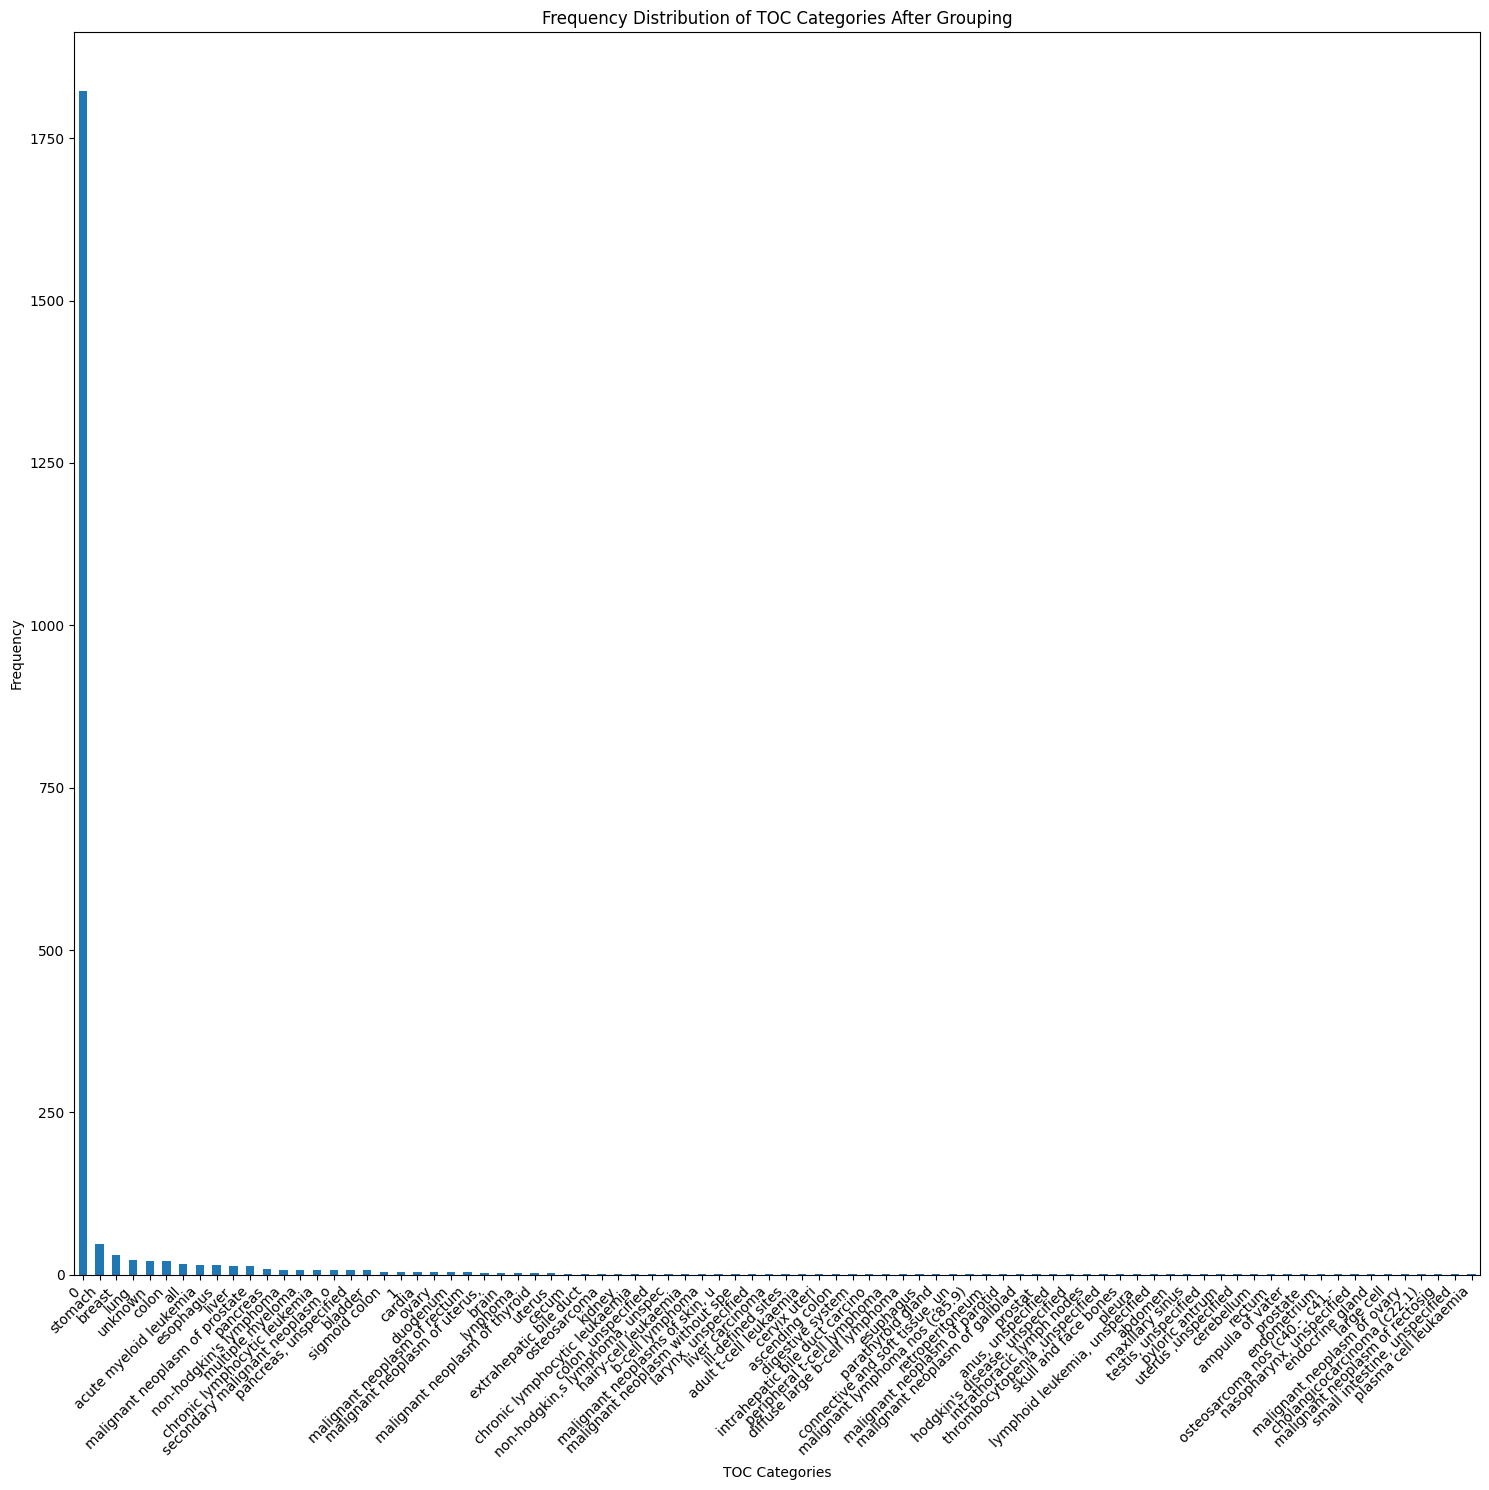

In [ ]:
toc_counts = df['TOC'].value_counts()

plt.figure(figsize=(15, 15))
toc_counts.plot(kind='bar')
plt.title("Frequency Distribution of TOC Categories After Grouping")
plt.xlabel("TOC Categories")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
df = df.drop(columns=['TOC'])

## Checking Features with Many Unique Values


These features are not useful and will just make the training more complex for the model. So, dropping them is a good decision.

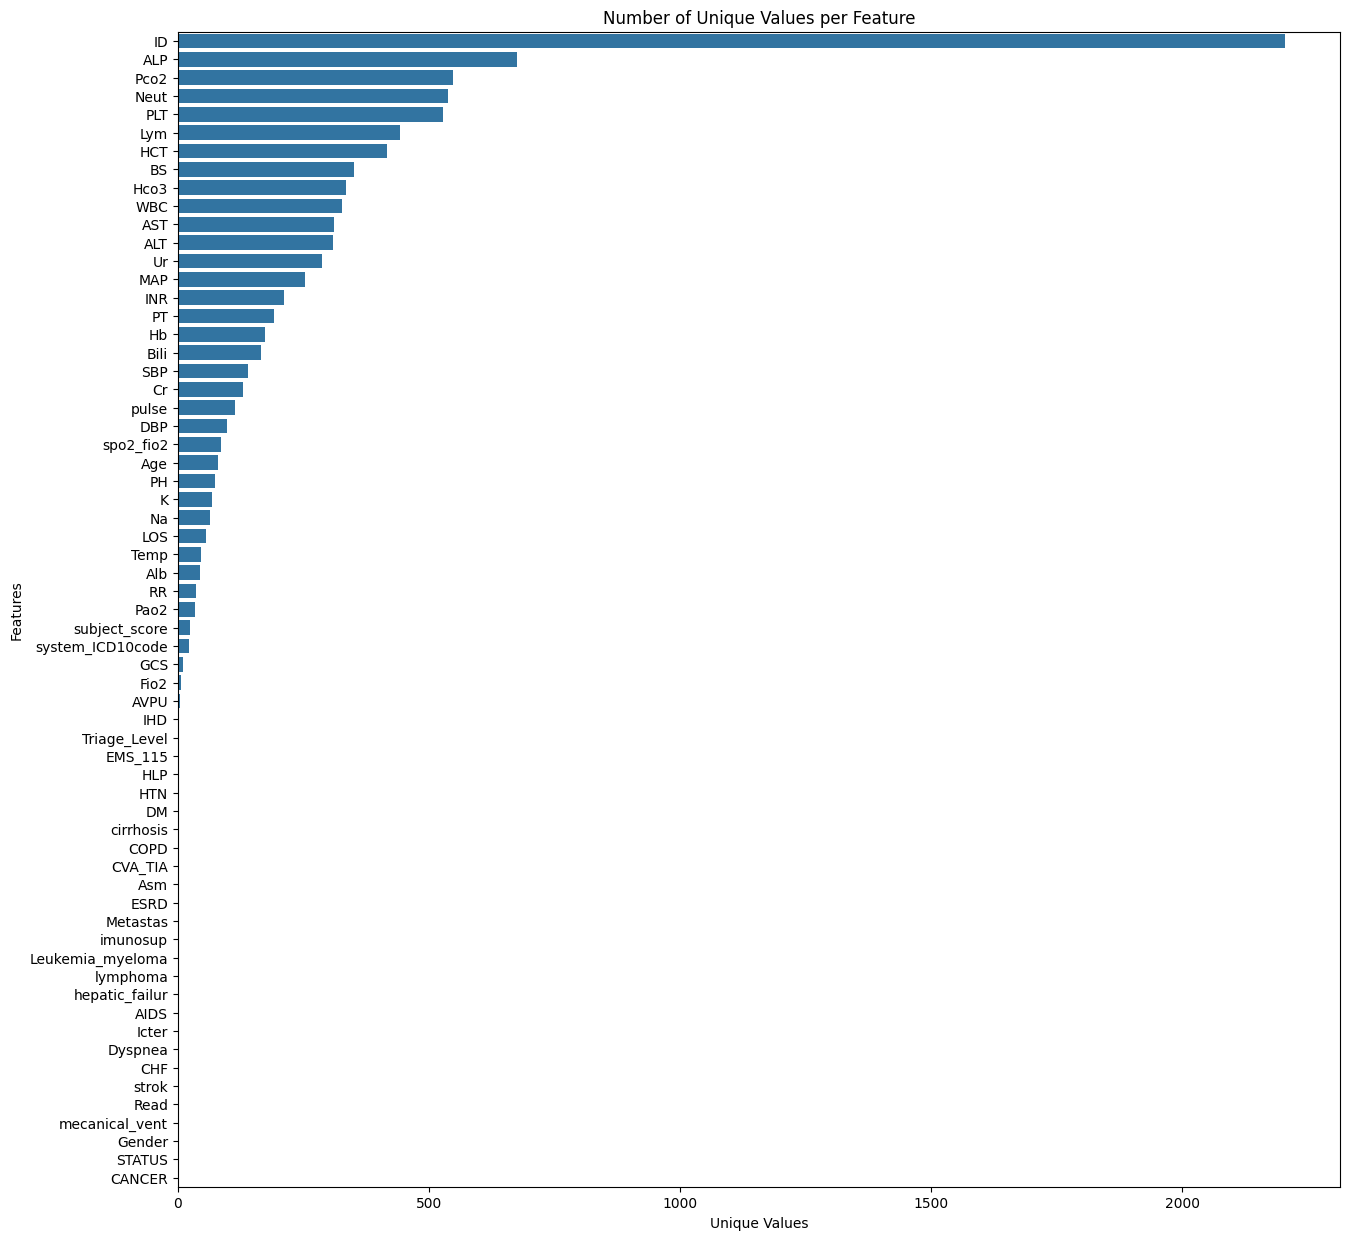

In [ ]:
unique_counts = []
for col in df.columns:
    unique_values = len(df[col].unique())
    percentage = round((unique_values / len(df)) * 100, 2)
    unique_counts.append((col, unique_values, percentage))

unique_counts_df = pd.DataFrame(unique_counts, columns=['Feature', 'Unique Values', 'Percentage'])
unique_counts_df = unique_counts_df.sort_values(by='Unique Values', ascending=False)

plt.figure(figsize=(15, 15))
sns.barplot(data=unique_counts_df, y='Feature', x='Unique Values')
plt.title("Number of Unique Values per Feature")
plt.xlabel("Unique Values")
plt.ylabel("Features")
plt.show()

### Dealing with features with too many unique values
As illustrated above, the ID column shows a huge amoung of unique values within it. The next code cell shows that it has 2205 unique values, one for each record, as it is used as the identifier for each record. Therefore, dropping it is a wise move, because it does not contribute the prediction accuracy, and it just adds complexity when building the models.

In [ ]:
print(f"ID Feature has {len(df['ID'].unique())} unique values, and total number of records is {len(df)}.")

ID Feature has 2205 unique values, and total number of records is 2205.


In [ ]:
df = df.drop(columns=['ID'])

## Dividing Features Into Groups


This section divides the features into categorical, and numerical features. It also further divides the categorical features into bi-class categorical features and multi-class categorical features.

In [ ]:
pd.set_option("display.max_columns", 200)
df.head()

,Age,STATUS,WBC,Hb,HCT,PLT,PT,INR,Neut,Lym,AST,ALT,ALP,BS,Na,K,Ur,Cr,Bili,Alb,PH,Pao2,Pco2,Hco3,Gender,GCS,AVPU,SBP,DBP,MAP,pulse,Temp,RR,Fio2,spo2_fio2,mecanical_vent,Read,strok,CHF,Dyspnea,IHD,CANCER,Icter,AIDS,imunosup,hepatic_failur,lymphoma,Leukemia_myeloma,cirrhosis,Metastas,subject_score,system_ICD10code,EMS_115,Triage_Level,HTN,DM,HLP,COPD,CVA_TIA,Asm,ESRD,LOS
0,34.0,Dead,5.1,11.2,35.8,185.0,50.0,9.23,81.5,20.8,1220.0,901.0,389.0,116.0,138.0,3.6,13.0,0.5,32.3,2.8,7.48,96.0,26.7,19.8,Female,15.0,A,93.0,67.0,75.67,128.0,36.8,14.0,21.0,457.14,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.0,No,Yes,No,No,No,No,50.0,Diseases of the digestive system,No,Level_3,No,No,No,No,No,No,No,7.0
1,20.0,Alive,17.5,13.4,41.4,222.0,15.3,1.31,15.3,7.3,147.0,159.0,635.0,119.0,137.0,3.8,30.0,0.8,0.8,4.1,7.39,97.0,38.5,23.1,Male,15.0,A,130.0,90.0,103.33,80.0,37.0,16.0,21.0,461.90,0.0,1.0,0.0,0.0,0.0,0.0,No,0.0,0.0,No,No,No,No,No,No,20.0,Diseases of the circulatory system,No,Level_3,No,No,No,No,No,No,No,14.0
2,77.0,Dead,5.2,12.4,37.8,84.0,13.2,1.82,1.2,11.9,41.0,55.0,44.0,94.0,130.0,5.2,92.0,3.0,0.7,2.8,7.30,96.0,32.8,16.2,Female,14.0,A,163.0,105.0,124.33,92.0,36.8,18.0,21.0,457.14,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.0,No,No,No,No,No,No,20.0,Certain infectious and parasitic diseases,No,Level_2,Yes,No,No,No,No,No,No,10.0
3,23.0,Alive,16.2,14.5,43.8,114.0,32.1,1.00,81.5,17.6,59.0,48.0,173.0,155.0,144.0,2.5,42.0,0.7,0.8,3.8,7.44,85.0,26.7,18.3,Female,8.0,U,100.0,60.0,73.33,100.0,37.0,12.0,100.0,85.00,1.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.0,No,No,No,No,No,No,60.0,Diseases of the respiratory system,No,Level_3,No,No,No,No,No,No,No,19.0
4,86.0,Alive,15.8,12.2,35.7,266.0,13.0,1.00,1.0,13.7,25.0,19.0,203.0,220.0,115.0,3.7,48.0,1.4,1.2,3.6,7.45,92.0,34.1,23.6,Female,15.0,A,150.0,90.0,110.00,85.0,37.0,19.0,21.0,438.10,0.0,1.0,0.0,0.0,0.0,0.0,No,0.0,0.0,No,No,No,No,No,No,30.0,"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",Yes,Level_3,No,No,No,No,No,No,No,2.0


## Retrieving all Numerical Features


Some categorical features have numerical values that represent the classes. For example, AIDS has 2 unique values, 0 meaning no AIDS, and 1 meaning AIDS.

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
print(numerical_cols)

Index(['Age', 'WBC', 'Hb', 'HCT', 'PLT', 'PT', 'INR', 'Neut', 'Lym', 'AST',
       'ALT', 'ALP', 'BS', 'Na', 'K', 'Ur', 'Cr', 'Bili', 'Alb', 'PH', 'Pao2',
       'Pco2', 'Hco3', 'GCS', 'SBP', 'DBP', 'MAP', 'pulse', 'Temp', 'RR',
       'Fio2', 'spo2_fio2', 'mecanical_vent', 'Read', 'strok', 'CHF',
       'Dyspnea', 'IHD', 'Icter', 'AIDS', 'subject_score', 'LOS'],
      dtype='object')


As shown below, features with only 2 unique values are likely to be bi-class categorical features, and features with 11 or less unique values are likely to be multi-class features.

In [ ]:
for col in df.columns:
  print(f"{col} has {len(df[col].unique())} unique values.")

Age has 80 unique values.
STATUS has 2 unique values.
WBC has 326 unique values.
Hb has 174 unique values.
HCT has 417 unique values.
PLT has 528 unique values.
PT has 192 unique values.
INR has 212 unique values.
Neut has 537 unique values.
Lym has 442 unique values.
AST has 310 unique values.
ALT has 309 unique values.
ALP has 675 unique values.
BS has 351 unique values.
Na has 64 unique values.
K has 67 unique values.
Ur has 286 unique values.
Cr has 130 unique values.
Bili has 165 unique values.
Alb has 44 unique values.
PH has 74 unique values.
Pao2 has 35 unique values.
Pco2 has 548 unique values.
Hco3 has 334 unique values.
Gender has 2 unique values.
GCS has 11 unique values.
AVPU has 4 unique values.
SBP has 140 unique values.
DBP has 97 unique values.
MAP has 253 unique values.
pulse has 114 unique values.
Temp has 46 unique values.
RR has 37 unique values.
Fio2 has 7 unique values.
spo2_fio2 has 86 unique values.
mecanical_vent has 2 unique values.
Read has 2 unique values.


### Dividing bi-class features and multi-class features

In [ ]:
bi_class = []
multi_class = []
for col in numerical_cols:
    if(len(df[col].unique()) == 2):
      bi_class.append(col)
    elif(len(df[col].unique()) <= 11 and len(df[col].unique()) > 2):
      multi_class.append(col)

In [ ]:
print(bi_class)

['mecanical_vent', 'Read', 'strok', 'CHF', 'Dyspnea', 'Icter', 'AIDS']


In [ ]:
print(multi_class)

['GCS', 'Fio2', 'IHD']


## Investigating features that have <= 11 unique values


It is not weird for Fio2 or GCS to have very few unique values. However, Ischemic Heart Disease (IHD) is supposed to have only 2 values, 1 for yes, and 0 for no. So, the 11 is likely an error, especially because it only exists in 1 record. Therefore, Fio2 and GCS are considered as numerical features, and IHD is considered as a bi-class categorical feature.

In [ ]:
print(multi_class)

['GCS', 'Fio2', 'IHD']


In [ ]:
df['Fio2'].unique()

array([ 21., 100.,  40.,  60.,  95.,  80.,  70.])

In [ ]:
df['GCS'].unique()

array([15., 14.,  8., 13., 12., 10.,  7.,  9., 11.,  6.,  3.])

In [ ]:
df['IHD'].unique()

array([ 0.,  1., 11.])

### Checking why IHD has 11

In [ ]:
df[df['IHD'] == 11]

,Age,STATUS,WBC,Hb,HCT,PLT,PT,INR,Neut,Lym,AST,ALT,ALP,BS,Na,K,Ur,Cr,Bili,Alb,PH,Pao2,Pco2,Hco3,Gender,GCS,AVPU,SBP,DBP,MAP,pulse,Temp,RR,Fio2,spo2_fio2,mecanical_vent,Read,strok,CHF,Dyspnea,IHD,CANCER,Icter,AIDS,imunosup,hepatic_failur,lymphoma,Leukemia_myeloma,cirrhosis,Metastas,subject_score,system_ICD10code,EMS_115,Triage_Level,HTN,DM,HLP,COPD,CVA_TIA,Asm,ESRD,LOS
397,81.0,Alive,11.5,11.6,34.7,103.0,12.2,1.47,84.9,7.1,62.0,59.0,588.0,113.0,134.0,3.0,31.0,0.7,15.1,3.1,7.45,98.0,34.7,24.2,Male,15.0,A,110.0,70.0,83.33,95.0,38.0,16.0,21.0,466.67,0.0,1.0,1.0,0.0,0.0,11.0,No,0.0,0.0,No,No,No,No,No,No,10.0,Diseases of the digestive system,No,Level_2,No,No,No,No,No,No,No,5.0


Fixing the error:

In [ ]:
df.loc[df['IHD'] == 11, 'IHD'] = 1


Adding IHD to bi_class and removing multi_class list, because there is no multi-class feature represented in numbers

In [ ]:
bi_class.append('IHD')
del multi_class
columns_represented_in_numbers = numerical_cols

### Outliers Analysis
In this outlier analysis, we used the z-score method to identify outliers values within numerical features. The z-score is a standardized measure that indicates how many standard deviations a data point is from the mean. By applying it to each feature, we can consistently identify outliers, regardless of their scale or unit.

We set the outlier threshold at |z| > 3, meaning any value more than three standard deviations away from the mean was considered as an outlier. This threshold is a common statistical cutoff because, in a normal distribution, approximately 99.7% of the data falls within ±3 standard deviations, leaving values beyond this range as rare and extreme. Choosing a lower threshold, like 2, would capture more points as "outliers" but might also incorrectly label typical values as outliers, especially in datasets with natural variability. Conversely, setting a higher threshold, like 4, would only capture the most extreme cases, potentially overlooking meaningful but less severe outliers. Using ±3 provides a balance, ensuring that we detect  outliers while avoiding excessive sensitivity to normal data variation.

We specifically excluded binary (boolean) features from the z-score calculation by removing columns identified in bi_class. Z-scores are designed for numerical features, so applying them to binary or boolean variables (which take on only two values, such as 0 and 1) could lead to misleading results. For example, in a binary feature with values 0 and 1, the mean might be close to 0.5, causing both values to be flagged as "outliers" based on z-scores. Moreover, binary features represent categories, so interpreting extreme values is inappropriate. Excluding binary columns ensures that the outlier analysis remains focused on features where extreme values have meaningful implications.

After calculating the z-scores, we filtered the results to focus on columns with actual outliers by identifying those with values outside the ±3 threshold. This allowed us to narrow down the analysis to features that contain outliers, making the process more manageable and ensuring that we prioritize features potentially requiring further attention. Features with frequent outliers might indicate issues such as measurement errors, extreme variability, or data quality problems, and highlighting these features provides guidance on where additional cleaning or detailed review may be necessary.

In [ ]:
from scipy.stats import zscore

numerical_cols = [x for x in numerical_cols if x not in bi_class]

z_scores = df[numerical_cols].apply(zscore)

columns_with_outliers = z_scores.columns[(z_scores > 3).any() | (z_scores < -3).any()]

print("Columns containing outliers:", list(columns_with_outliers))

Columns containing outliers: ['WBC', 'Hb', 'HCT', 'PLT', 'PT', 'INR', 'Neut', 'Lym', 'AST', 'ALT', 'ALP', 'BS', 'Na', 'K', 'Ur', 'Cr', 'Bili', 'Alb', 'PH', 'Pao2', 'Pco2', 'Hco3', 'GCS', 'SBP', 'DBP', 'MAP', 'pulse', 'Temp', 'RR', 'Fio2', 'spo2_fio2', 'subject_score', 'LOS']


In [ ]:
print(f'Number of features that have outliers: {len(list(columns_with_outliers))}')

Number of features that have outliers: 33


To visualize the results, we used a bar plot to display the number of outliers per feature, sorted in descending order. This visualization makes it easy to quickly identify which features have the most outliers, allowing us to prioritize columns that might need further examination. For example, features with a high number of outliers may require (capping, transformation, or even removal) of extreme values **to be discussed later**, especially if they are influential in the model or analysis.

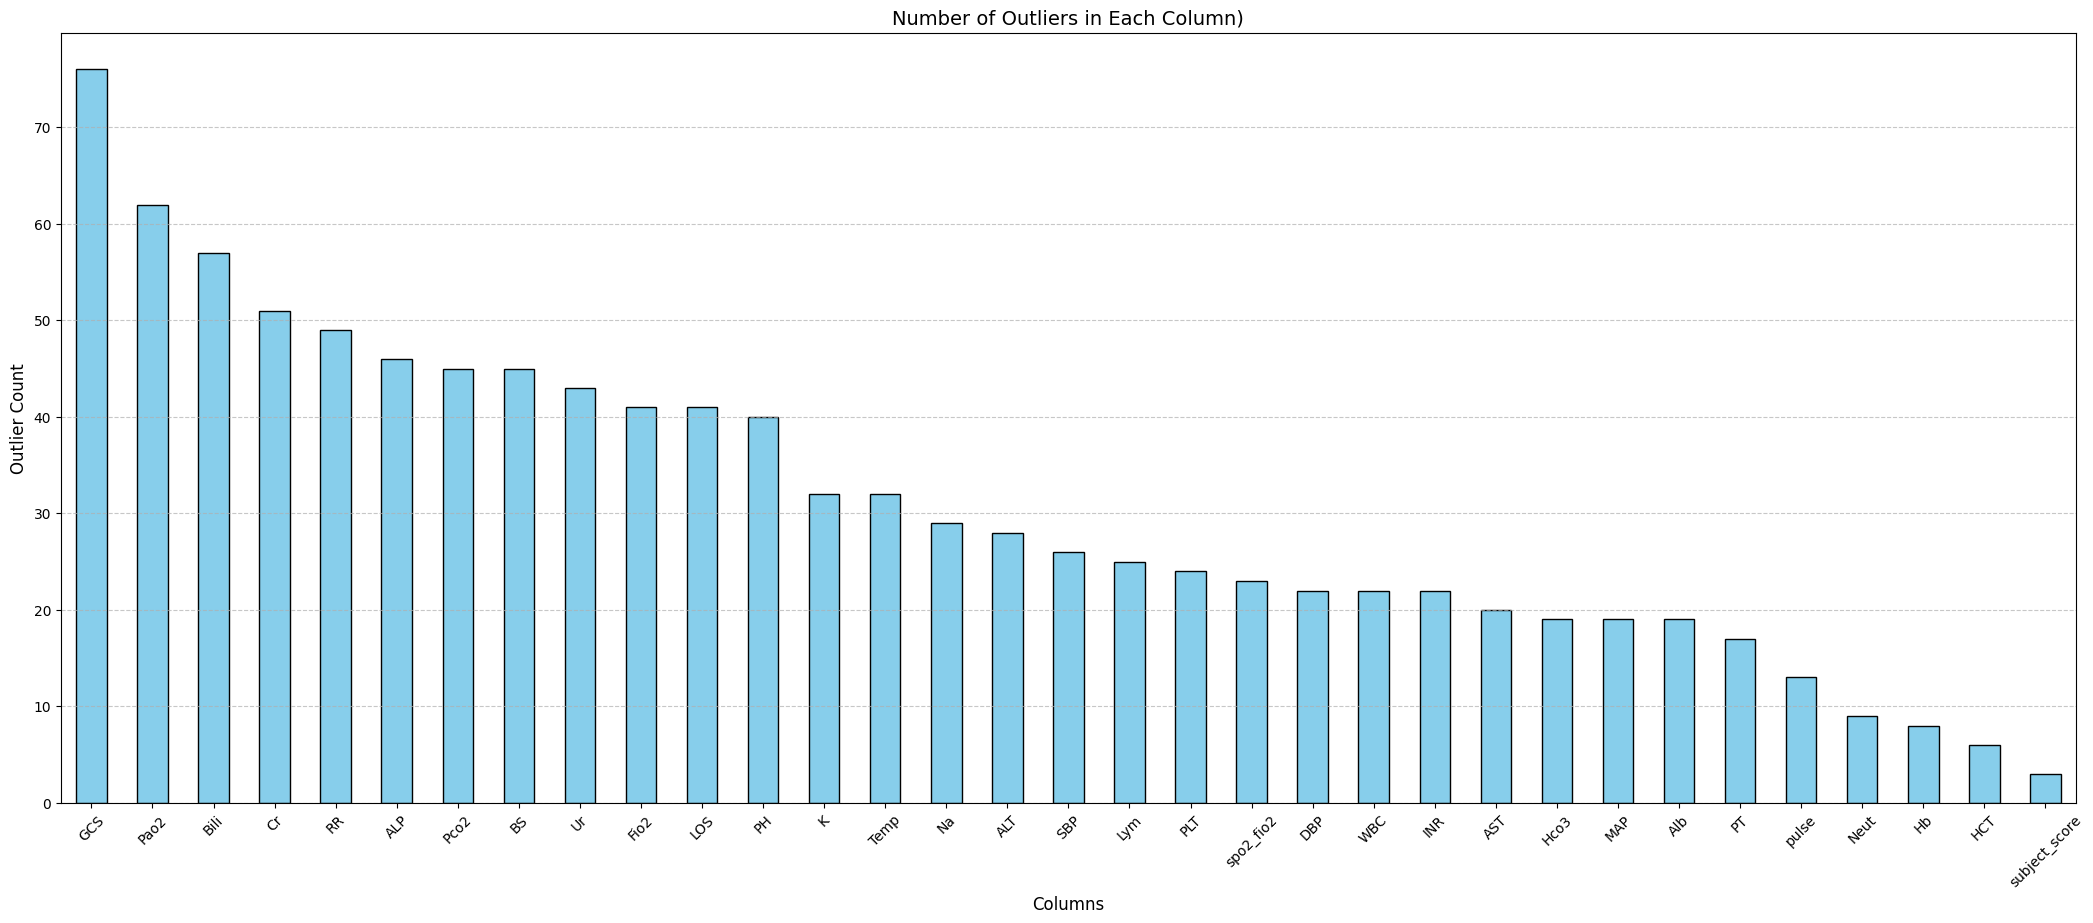

In [ ]:
outliers_per_column = (z_scores > 3).sum() + (z_scores < -3).sum()

columns_with_outliers = outliers_per_column[outliers_per_column > 0]

plt.figure(figsize=(26, 10))
columns_with_outliers.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Outliers in Each Column)', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Outlier Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("Number of outlier records in each column (excluding columns with zero outliers):")
print(columns_with_outliers)

Number of outlier records in each column (excluding columns with zero outliers):
WBC              22
Hb                8
HCT               6
PLT              24
PT               17
INR              22
Neut              9
Lym              25
AST              20
ALT              28
ALP              46
BS               45
Na               29
K                32
Ur               43
Cr               51
Bili             57
Alb              19
PH               40
Pao2             62
Pco2             45
Hco3             19
GCS              76
SBP              26
DBP              22
MAP              19
pulse            13
Temp             32
RR               49
Fio2             41
spo2_fio2        23
subject_score     3
LOS              41
dtype: int64


### Handling Outliers
</br>
1. Retaining Medically Relevant Outliers (using percentile-based capping) </br>
</br> Medically relevant features, such as vital signs, blood gas levels, electrolyte concentrations, and the Glasgow Coma Scale (GCS), are critical for assessing a patient’s immediate health and risk. Outliers in these features often represent genuine, clinically significant cases that could influence triage decisions


*   Vital Signs: Extreme values in blood pressure (SBP, DBP, MAP) and respiratory rate (RR) could indicate life-threatening conditions, such as shock or respiratory distress. Retaining these outliers ensures that the model can recognize patterns associated with critical states.
*   Blood Gases and Oxygen Indicators: Abnormal levels in Pao2, Pco2, Fio2, and spo2_fio2 may indicate respiratory failure or hypoxemia, conditions that are directly relevant to determining a patient’s triage level.


*   Electrolytes: Extreme potassium (K) levels could signal metabolic imbalances that may lead to cardiac issues, requiring immediate intervention. Retaining these outliers allows the model to consider such emergencies.
*   Glasgow Coma Scale (GCS): A low GCS score can indicate neurological impairment, which is crucial for assessing the urgency of treatment, especially in trauma or unconscious patients.

To preserve the clinical significance of these outliers while avoiding excessive noise, we use percentile-based capping. Capping values at the 1st and 99th percentiles allows us to keep clinically plausible extremes, ensuring the model remains sensitive to critical cases without being skewed by highly rare outliers.



In [ ]:
# Define percentile thresholds for capping
lower_percentile = 0.01   # 1st percentile
upper_percentile = 0.99   # 99th percentile

retain_outliers_features = [
    'PLT', 'Neut', 'Lym', 'SBP', 'DBP', 'MAP', 'RR', 'Pao2', 'Pco2',
    'Fio2', 'spo2_fio2', 'K', 'GCS'
]

# Apply percentile-based capping for these features
for feature in retain_outliers_features:
    lower_bound = df[feature].quantile(lower_percentile)
    upper_bound = df[feature].quantile(upper_percentile)
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

print("Outliers in medically relevant features have been capped based on percentiles.")


Outliers in medically relevant features have been capped based on percentiles.


2. Remove outliers in less relevant features (using z-score filtering) </br></br>
For less relevant features, such as liver enzymes, kidney markers, and length of stay (LOS), outliers are less likely to provide valuable information for triage decisions. These features may reflect longer-term health conditions rather than acute physiological states. Extreme values in these features can add noise without contributing meaningfully to the prediction of triage level:
</br></br>


*   Liver Enzymes and Kidney Markers: Extreme values in AST, ALT, ALP, Ur, Cr, and Bili are generally more relevant for chronic conditions than for acute triage needs. Outliers in these features are unlikely to impact immediate urgency but may introduce unnecessary variability.

*   Coagulation Markers: While PT and INR are important in assessing bleeding risk, they are not always critical for determining initial triage level. Outliers in these features may add noise without providing a significant benefit for urgency assessment.



*   Length of Stay (LOS): LOS is typically a post-admission outcome rather than a metric used in initial triage. Extreme values in LOS can add post-treatment variability that does not contribute to understanding a patient’s initial urgency level.

</br>

By applying z-score filtering and removing rows with extreme values (|z| > 3) in these features, we can reduce noise in the data without losing critical information for triage. This method ensures that the model focuses on features more directly relevant to acute conditions and triage level.







In [ ]:
# List of less relevant features for which we’ll remove outliers
remove_outliers_features = [
    'PT', 'INR', 'AST', 'ALT', 'ALP', 'BS', 'Ur', 'Cr', 'Bili', 'Alb', 'LOS'
]

z_scores_remove = df[remove_outliers_features].apply(zscore)

df = df[(z_scores_remove < 3).all(axis=1)]

print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers in less relevant features:", df.shape)


Original dataset shape: (1900, 62)
Dataset shape after removing outliers in less relevant features: (1900, 62)


## Retrieving All Textual Features


The section above divided the features represented in numbers into numerical features and categorical features. This section, on the other hand, divides the textual features into bi-class categorical features and multi-class categorical features only.

In [ ]:
textual_cols = [x for x in df.columns if x not in columns_represented_in_numbers]
print(f'Textual features: {textual_cols}')

Textual features: ['STATUS', 'Gender', 'AVPU', 'CANCER', 'imunosup', 'hepatic_failur', 'lymphoma', 'Leukemia_myeloma', 'cirrhosis', 'Metastas', 'system_ICD10code', 'EMS_115', 'Triage_Level', 'HTN', 'DM', 'HLP', 'COPD', 'CVA_TIA', 'Asm', 'ESRD']


The following code cell shows the number of unique values in each textual feature. The result shows that many of them are bi-class categorical features, 2 multi-class categorical features with 4 or less uniques values. It also shows a feature with a significant number of unique values,specifically 23.

In [ ]:
for col in textual_cols:
  print(f"{col}: {len(df[col].unique())}")

STATUS: 2
Gender: 2
AVPU: 4
CANCER: 2
imunosup: 1
hepatic_failur: 2
lymphoma: 2
Leukemia_myeloma: 2
cirrhosis: 2
Metastas: 2
system_ICD10code: 23
EMS_115: 2
Triage_Level: 3
HTN: 2
DM: 2
HLP: 2
COPD: 2
CVA_TIA: 2
Asm: 2
ESRD: 2


In [ ]:
text_bi_class = []
text_multi_class = []
for col in textual_cols:
    if(len(df[col].unique()) == 2):
      text_bi_class.append(col)
    elif(len(df[col].unique()) <= 4):
      text_multi_class.append(col)
    else:
      print(f"{col} has {len(df[col].unique())} unique values")

system_ICD10code has 23 unique values


In [ ]:
print(text_bi_class)

['STATUS', 'Gender', 'CANCER', 'hepatic_failur', 'lymphoma', 'Leukemia_myeloma', 'cirrhosis', 'Metastas', 'EMS_115', 'HTN', 'DM', 'HLP', 'COPD', 'CVA_TIA', 'Asm', 'ESRD']


In [ ]:
print(text_multi_class)

['AVPU', 'imunosup', 'Triage_Level']


In [ ]:
df['AVPU'].unique()

array(['A', 'U', 'V', 'P'], dtype=object)

In [ ]:
for col in text_bi_class:
  print(f"{col}: {df[col].unique()}")

STATUS: ['Alive' 'Dead']
Gender: ['Male' 'Female']
CANCER: ['No' 'Yes']
hepatic_failur: ['No' 'Yes']
lymphoma: ['No' 'Yes']
Leukemia_myeloma: ['No' 'Yes']
cirrhosis: ['No' 'Yes']
Metastas: ['No' 'Yes']
EMS_115: ['No' 'Yes']
HTN: ['No' 'Yes']
DM: ['No' 'Yes']
HLP: ['No' 'Yes']
COPD: ['No' 'Yes']
CVA_TIA: ['No' 'Yes']
Asm: ['No' 'Yes']
ESRD: ['No' 'Yes']


### Investigating the feature system_ICD10code
As shown below, this feature shows the classification of diseases. Since some of them are too long, and there are some of that are ambiguous, we need to normalize this feature by mapping ambiguous values to "other", and to make too long classes to be shorter. And since shows a lot of classes, it is considered as a multi-class categorical feature.

In [ ]:
df['system_ICD10code'].unique()

array(['Diseases of the circulatory system',
       'Certain infectious and parasitic diseases',
       'Diseases of the respiratory system',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
       'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism (D50-D89)',
       'Diseases of the digestive system',
       'Diseases of the genitourinary system',
       'Endocrine, nutritional and metabolic diseases (E00-E90)',
       'Diseases of the nervous system',
       'Diseases of the skin and subcutaneous tissue',
       'Injury, poisoning and certain other consequences of external causes',
       'Diseases of the musculoskeletal system and connective tissue',
       'Neoplasms (C00-D48)', 'Y',
       'Pregnancy, childbirth and the puerperium',
       'Mental and behavioural disorders',
       'Diseases of the eye and adnexa', 'W', 'X',
       'Congenital malformations, deformations and chromoso

In [ ]:
icd10_grouping = {
    # Infectious and immune system
    'Certain infectious and parasitic diseases': 'Infectious diseases',
    'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism (D50-D89)': 'Immune and blood disorders',

    # Neoplasms
    'Neoplasms (C00-D48)': 'Neoplasms',

    # Endocrine and metabolic
    'Endocrine, nutritional and metabolic diseases (E00-E90)': 'Endocrine and metabolic disorders',

    # Mental health
    'Mental and behavioural disorders': 'Mental health disorders',

    # Nervous system
    'Diseases of the nervous system': 'Nervous system disorders',

    # Eye and ear (sensory)
    'Diseases of the eye and adnexa': 'Sensory disorders',
    'Diseases of the ear and mastoid process': 'Sensory disorders',

    # Cardiovascular and circulatory
    'Diseases of the circulatory system': 'Circulatory system disorders',

    # Respiratory
    'Diseases of the respiratory system': 'Respiratory disorders',

    # Digestive
    'Diseases of the digestive system': 'Digestive system disorders',

    # Musculoskeletal and connective tissue
    'Diseases of the musculoskeletal system and connective tissue': 'Musculoskeletal disorders',

    # Genitourinary
    'Diseases of the genitourinary system': 'Genitourinary disorders',

    # Pregnancy and childbirth
    'Pregnancy, childbirth and the puerperium': 'Reproductive and pregnancy-related',

    # Skin
    'Diseases of the skin and subcutaneous tissue': 'Skin disorders',

    # Congenital and developmental
    'Congenital malformations, deformations and chromosomal abnormalities': 'Congenital and developmental disorders',

    # Symptoms and general findings
    'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified': 'General symptoms and findings',

    # Injury and poisoning
    'Injury, poisoning and certain other consequences of external causes': 'Injuries and poisoning',

    # Social and environmental
    'Factors influencing health status and contact with health services': 'Social and environmental factors',

    # Special codes and unspecified
    'Y': 'Other and unspecified',
    'X': 'Other and unspecified',
    'W': 'Other and unspecified',
    'U': 'Other and unspecified',
    'V': 'Other and unspecified'
}

In [ ]:
df['system_ICD10code'] = df['system_ICD10code'].map(icd10_grouping)
text_multi_class.append('system_ICD10code')

## Hypotheses Formulation




 **Hypothesis 1: Age and Survival Status**
- **Hypothesis**: The average age of patients who did not survive (`STATUS = 'Dead'`) is higher than those who survived (`STATUS = 'Alive'`).
- **Reason**: Age can often influence health outcomes, with older populations generally being at a higher risk of mortality.

 **Hypothesis 2: Triage Level and Survival**
- **Hypothesis**: Patients in higher Triage Levels (e.g., `Level_2`, `Level_3`) are more likely to have fatal outcomes (`STATUS = 'Dead'`).
- **Reason**: Triage Level reflects the severity of the patient’s condition, which may correlate with mortality.


 #### Applying inferential techniques (e.g., t-tests).

To test the hypotheses we formulated, we applied several inferential statistical techniques that allowed us to evaluate relationships and differences in our dataset.




* We used a t-test to compare the mean age of the two groups (Alive and Dead) to determine if the observed difference in average age is statistically significant.



**T-Test Results**:
- The p-value (< 0.05) indicates a significant difference in the average age between survival groups.
- This supports the hypothesis that older patients are more likely to have worse survival outcomes.

In [ ]:
import scipy.stats as stats

alive_ages = df[df['STATUS'] == 'Alive']['Age'].dropna()
dead_ages = df[df['STATUS'] == 'Dead']['Age'].dropna()

t_stat, p_value = stats.ttest_ind(alive_ages, dead_ages)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in age between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in age between the groups.")



T-statistic: -7.699319219957209
P-value: 2.1858542177004725e-14
Reject the null hypothesis: There is a significant difference in age between the groups.


#### Age Distribution by Survival Status
This plot compares the age distribution of patients based on their survival status.

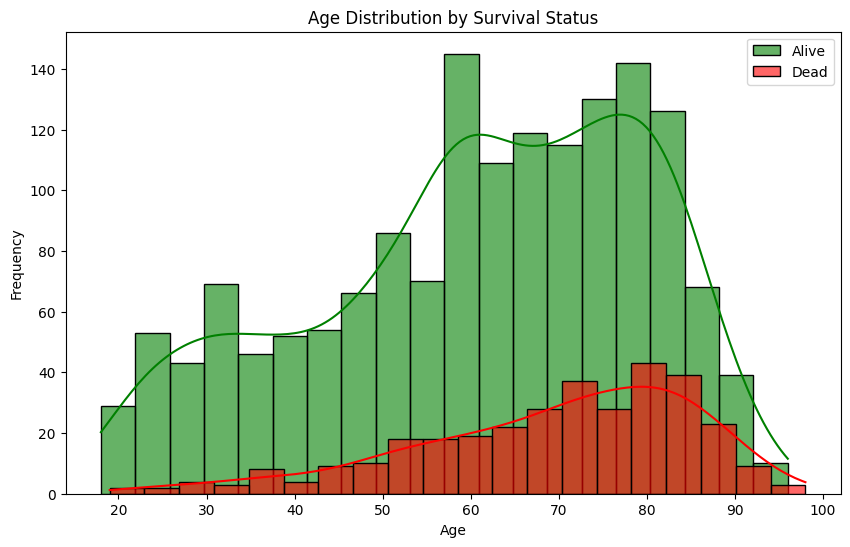

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['STATUS'] == 'Alive'], x='Age', color='green', kde=True, label='Alive', bins=20, alpha=0.6)
sns.histplot(data=df[df['STATUS'] == 'Dead'], x='Age', color='red', kde=True, label='Dead', bins=20, alpha=0.6)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()


* We used a chi-square test to examine the association between triage levels and survival status to determine if the observed differences are statistically significant.
Results:

**chi results**:
- The p-value (< 0.05) indicates a significant association between triage levels and survival status.
- This supports the hypothesis that triage levels influence patient survival outcomes, with higher triage levels being associated with poorer survival rates.

In [ ]:
triage_survival_ct = pd.crosstab(df['Triage_Level'], df['STATUS'])

from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected = chi2_contingency(triage_survival_ct)

print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Triage Level and Survival Status are associated.")
else:
    print("Fail to reject the null hypothesis: No significant association between Triage Level and Survival Status.")


Chi-square Statistic: 68.17517658246513
P-value: 1.5701766103118687e-15
Reject the null hypothesis: Triage Level and Survival Status are associated.


#### Survival Status Counts by Triage Level
This bar chart illustrates the distribution of survival



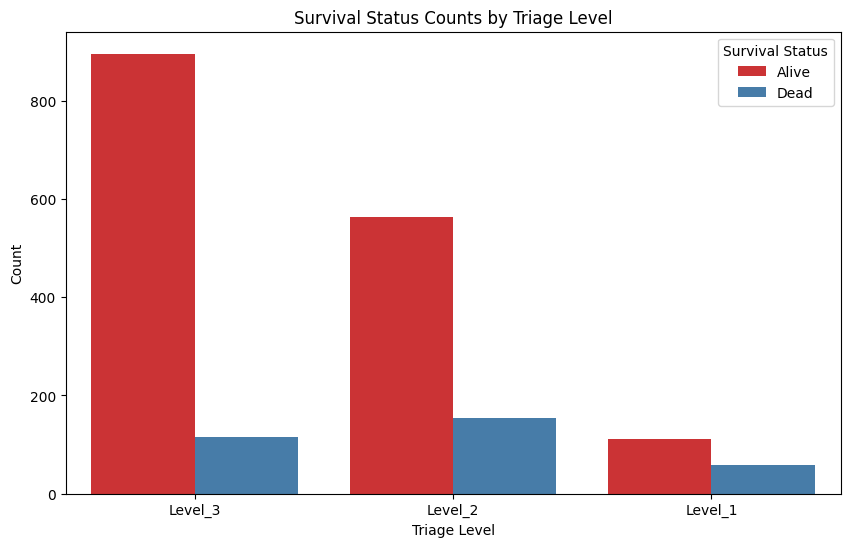

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Triage_Level', hue='STATUS', palette="Set1")
plt.title("Survival Status Counts by Triage Level")
plt.xlabel("Triage Level")
plt.ylabel("Count")
plt.legend(title="Survival Status")
plt.show()

### Handling Imbalance in Categorical Features

In [ ]:
from collections import Counter


imbalanced_features = ['STATUS', 'AVPU', 'CANCER', 'imunosup', 'hepatic_failur',
  'lymphoma', 'Leukemia_myeloma', 'cirrhosis', 'Metastas',
  'system_ICD10code', 'Triage_Level', 'DM', 'HLP', 'COPD',
  'CVA_TIA', 'Asm', 'ESRD'] # As shown in a previous code cell's output

# Checking imbalance ratios
imbalance_ratios = {feature: Counter(df[feature]) for feature in imbalanced_features}

imbalance_ratios

{'STATUS': Counter({'Alive': 1571, 'Dead': 329}),
 'AVPU': Counter({'A': 1598, 'U': 28, 'V': 242, 'P': 32}),
 'CANCER': Counter({'No': 1591, 'Yes': 309}),
 'imunosup': Counter({'No': 1900}),
 'hepatic_failur': Counter({'No': 1873, 'Yes': 27}),
 'lymphoma': Counter({'No': 1884, 'Yes': 16}),
 'Leukemia_myeloma': Counter({'No': 1882, 'Yes': 18}),
 'cirrhosis': Counter({'No': 1845, 'Yes': 55}),
 'Metastas': Counter({'No': 1841, 'Yes': 59}),
 'system_ICD10code': Counter({'Circulatory system disorders': 254,
          'Infectious diseases': 143,
          'Respiratory disorders': 265,
          'General symptoms and findings': 133,
          'Immune and blood disorders': 63,
          'Digestive system disorders': 485,
          'Genitourinary disorders': 173,
          'Endocrine and metabolic disorders': 50,
          'Nervous system disorders': 14,
          'Skin disorders': 11,
          'Injuries and poisoning': 32,
          'Musculoskeletal disorders': 22,
          'Neoplasms': 234,

In [ ]:
from imblearn.over_sampling import SMOTENC

X = df.drop(columns=['Triage_Level'])
y = df['Triage_Level']


categorical_features = set(bi_class + text_bi_class + text_multi_class)
print(categorical_features)

categorical_features = categorical_features.intersection(set(X.columns))

categorical_indices = [list(X.columns).index(col) for col in categorical_features]

smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)

X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# Convert X_resampled to a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Convert y_resampled to a Series (or DataFrame if needed)
y_resampled_df = pd.Series(y_resampled, name='Triage_Level')

# Combine X_resampled and y_resampled back into a single DataFrame
df = pd.concat([X_resampled_df, y_resampled_df], axis=1)


{'COPD', 'AIDS', 'AVPU', 'DM', 'imunosup', 'Triage_Level', 'ESRD', 'Read', 'mecanical_vent', 'STATUS', 'strok', 'system_ICD10code', 'CANCER', 'CHF', 'Dyspnea', 'lymphoma', 'Metastas', 'hepatic_failur', 'cirrhosis', 'Gender', 'IHD', 'HLP', 'CVA_TIA', 'Icter', 'Asm', 'EMS_115', 'HTN', 'Leukemia_myeloma'}


## Results of Balancing


The following frequency distribution shows the imbalanced features after applying SMOTENC on them. As illustrated below, some imbalanced features became balanced, such as the target feature triage level.

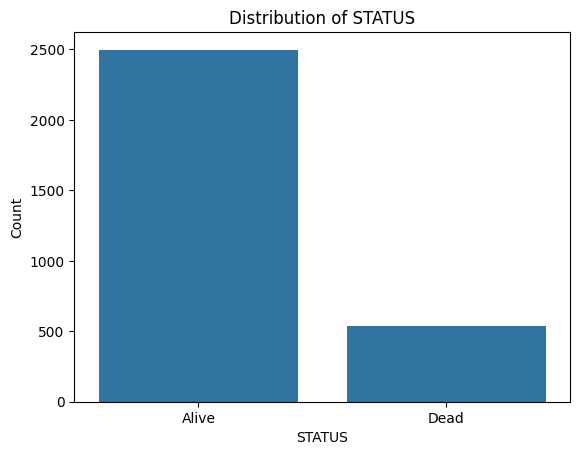

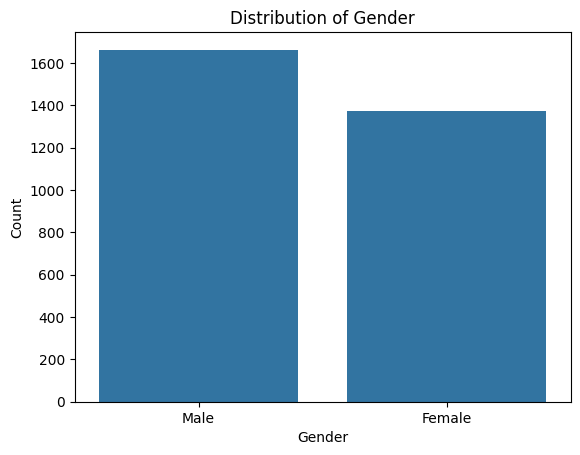

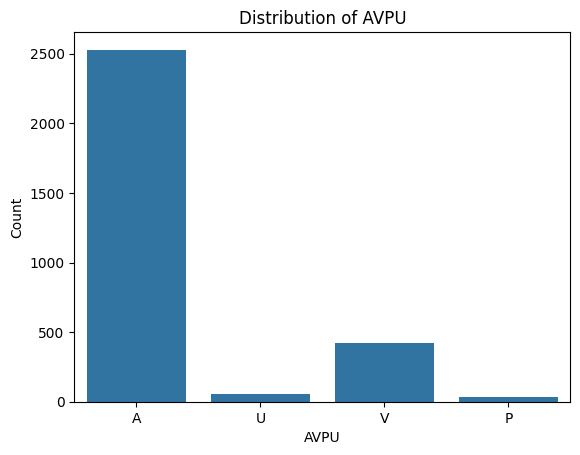

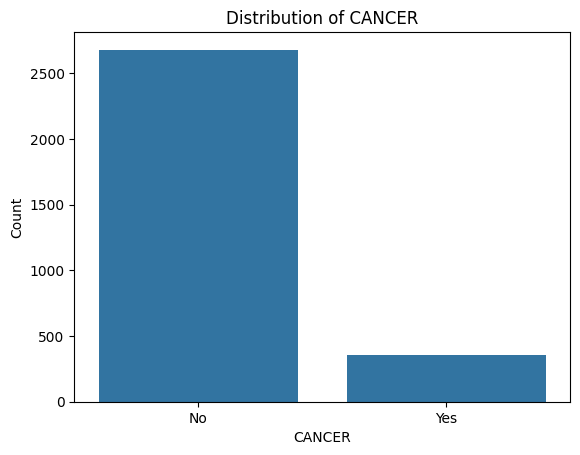

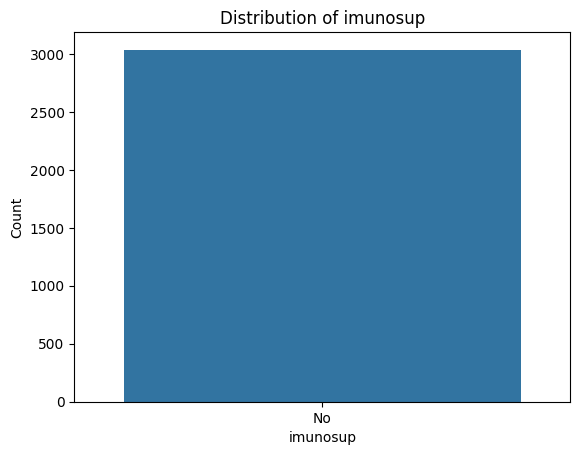

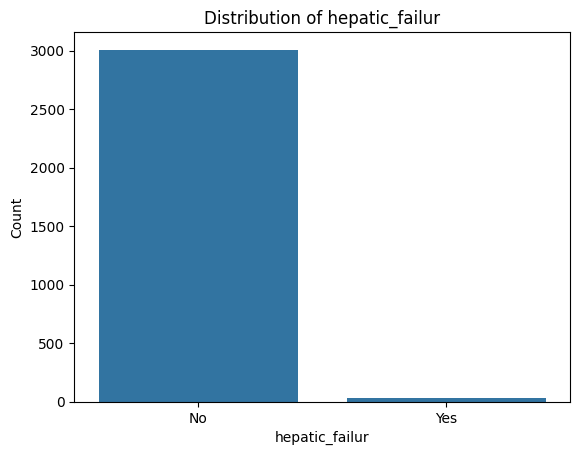

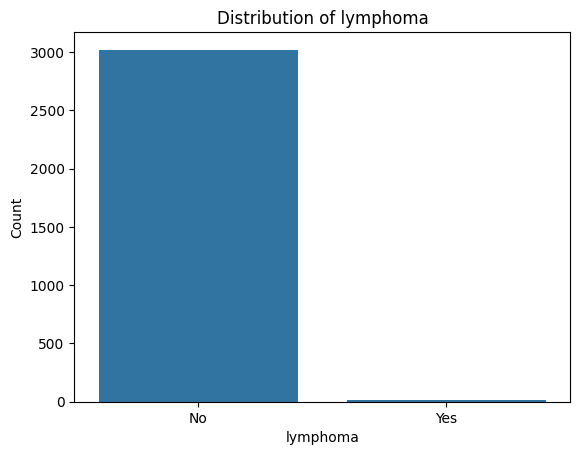

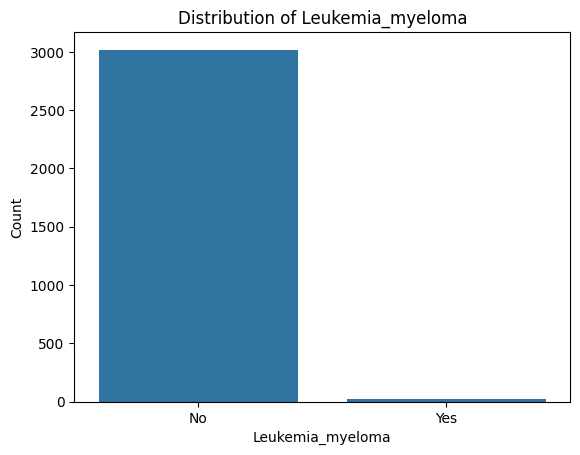

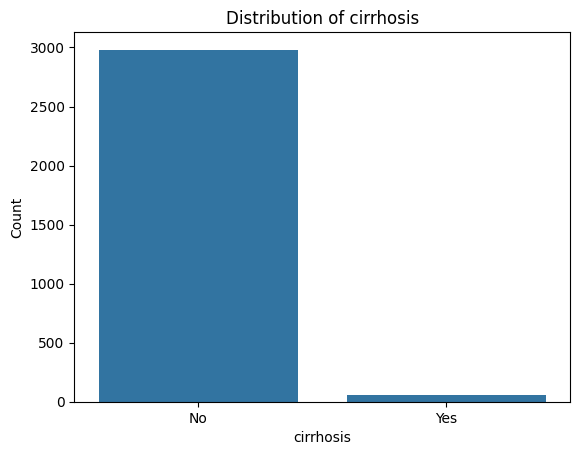

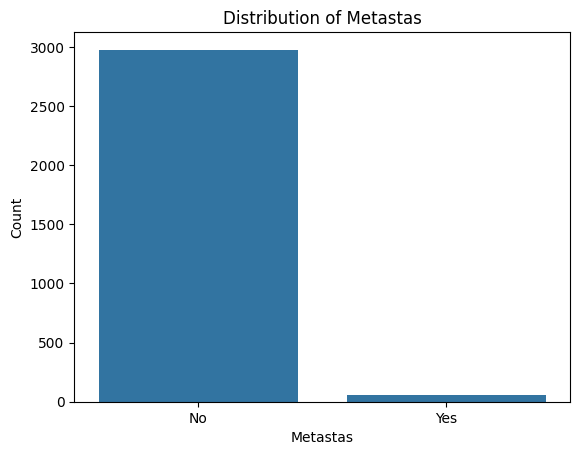

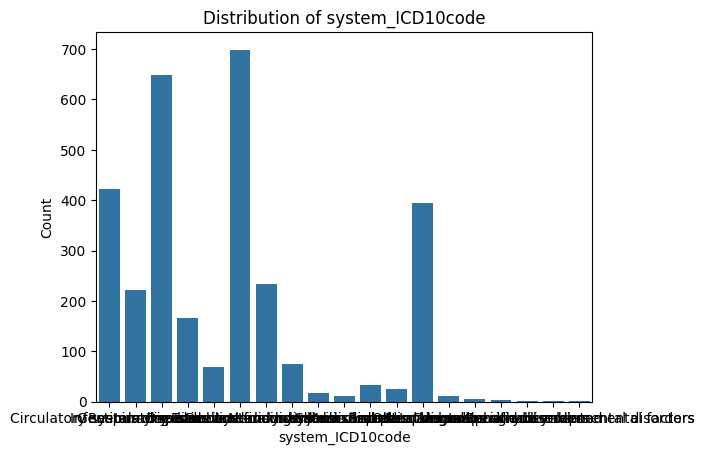

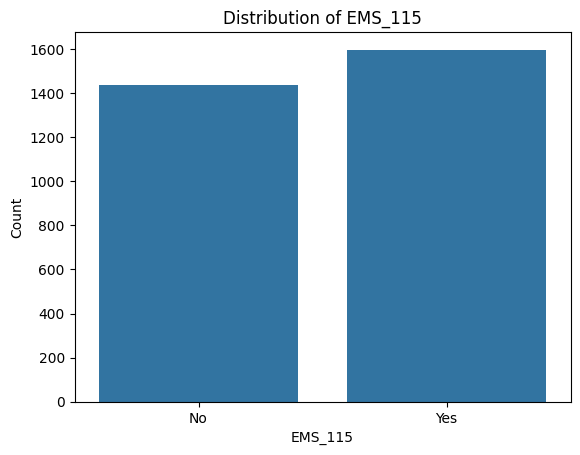

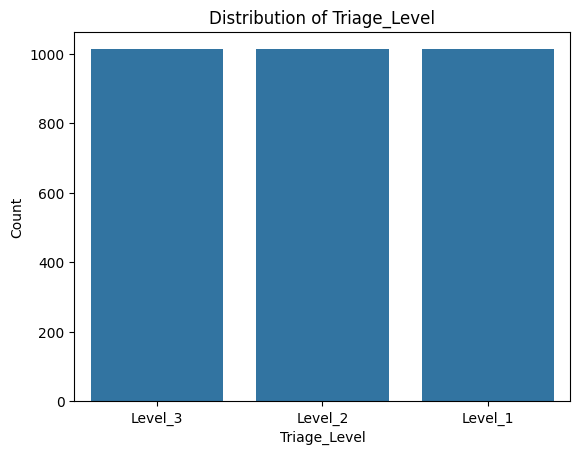

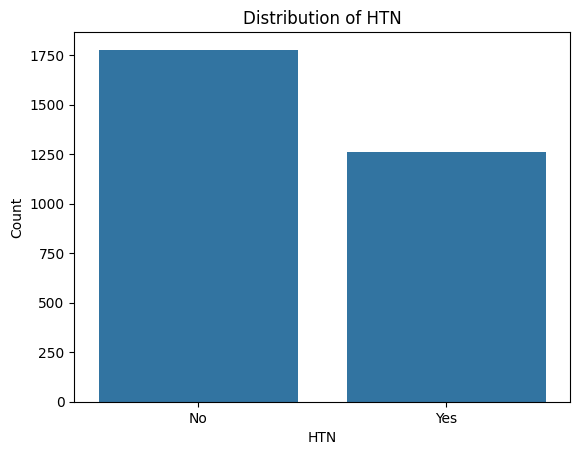

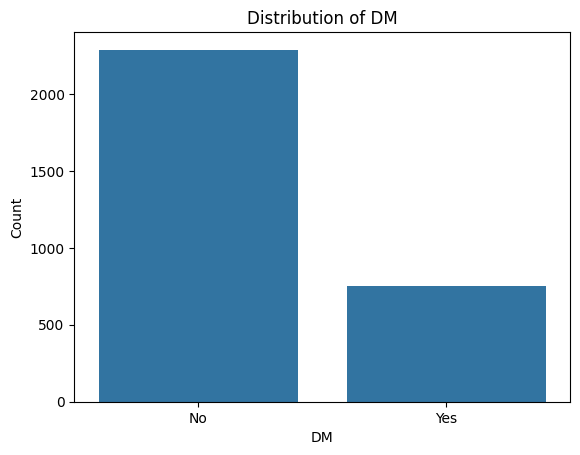

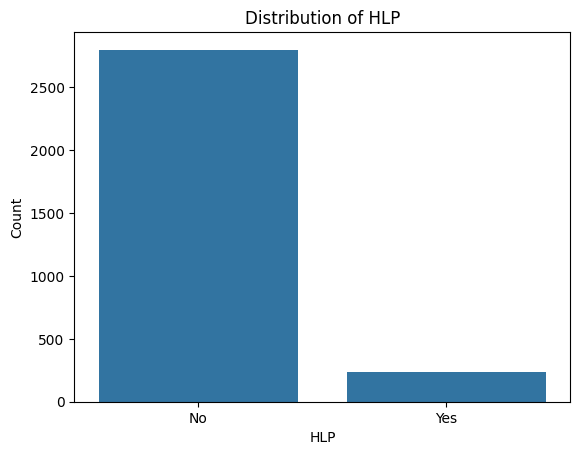

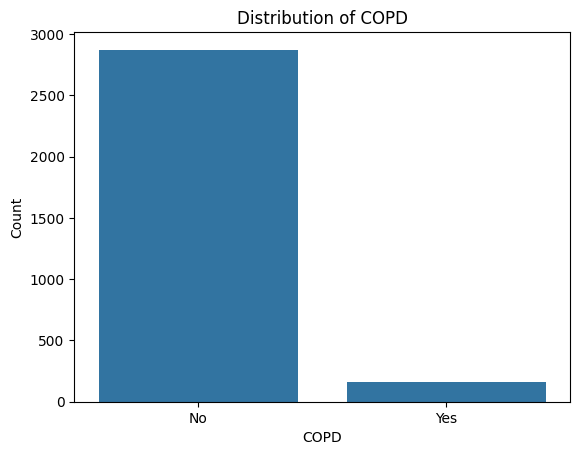

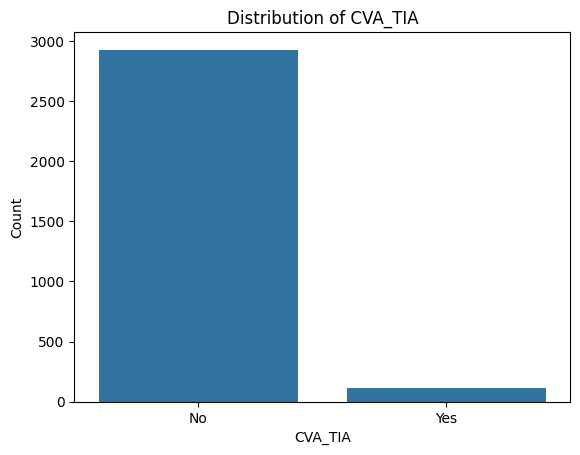

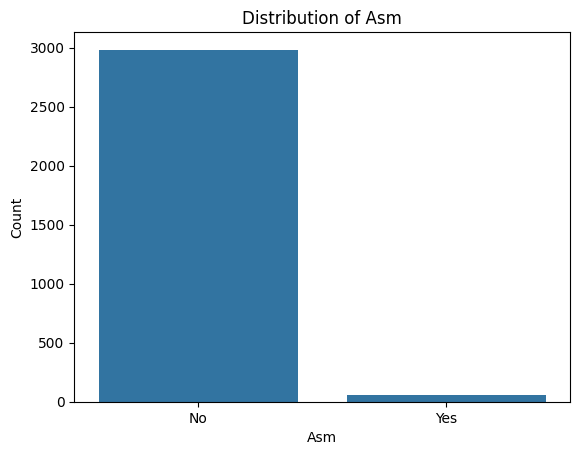

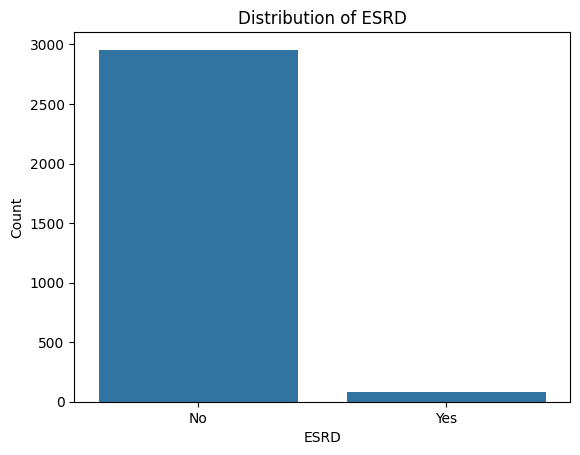

In [ ]:
for col in categorical_cols:
  if col in df.columns:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### **Summary of EDA Findings**
- The dataset contains a mix of numerical and categorical features, with 2205 records and 67 features initially.
- Key observations from the descriptive statistics include:
  - The mean age is approximately 62 years, with a diverse range (1 to 98 years).
  - Significant missing data was identified in some features, leading to the removal of those with >70% missing values.
  - Patterns and distributions were analyzed for key numerical features.
- Outliers were identified in numerical features using z-score analysis, and appropriate handling methods (e.g., capping or removal) were applied.
- Hypotheses were formulated to explore relationships, such as:
  1. **Age and Survival Status:** Older patients are more likely to have worse survival outcomes.
  2. **Triage Levels and Survival Status:** Triage levels influence patient survival outcomes.
- There were many categorical features with significant imbalance, and they were handled with SMOTENC.




# Milestone II
Building on the work in Milestone 1, Milestone 2 will investigate various machine learning models to automate the triage process. This will involve testing models such as Random Forest, Logistic Regression, XGBoost, gaussian naive bayes, and SVM to identify the most effective one. Each model's performance will be analyzed using statistical metrics and visualizations, and a comparative analysis will guide the selection of the best model.

## Prepearing steps for the model


**These are common steps for all models.**

### Scaling Numerical Features

This code shows the standardizes the numerical columns in the dataset, preparing the data for machine learning models. Standardization ensures that all numerical features have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### Encoding Categorical Features
In this code, we converted the textual features into a numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# text_bi_class_mapping = {'Dead' : 0, 'Alive' : 1, 'Female' : 0, 'Male': 1, 'No' : 0, 'Yes': 1}
for col in text_bi_class:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])

In [ ]:
multi_class_encoders = []
for col in text_multi_class:
    text_multi_class_encoder = LabelEncoder()
    df[col] = text_multi_class_encoder.fit_transform(df[col])
    multi_class_encoders.append((col, text_multi_class_encoder))

In [ ]:
from sklearn.preprocessing import LabelEncoder

ICD10code_encoder = LabelEncoder()
df['system_ICD10code'] = ICD10code_encoder.fit_transform(df['system_ICD10code'])

In [ ]:
df.head()

,Age,STATUS,WBC,Hb,HCT,PLT,PT,INR,Neut,Lym,AST,ALT,ALP,BS,Na,K,Ur,Cr,Bili,Alb,PH,Pao2,Pco2,Hco3,Gender,GCS,AVPU,SBP,DBP,MAP,pulse,Temp,RR,Fio2,spo2_fio2,mecanical_vent,Read,strok,CHF,Dyspnea,IHD,CANCER,Icter,AIDS,imunosup,hepatic_failur,lymphoma,Leukemia_myeloma,cirrhosis,Metastas,subject_score,system_ICD10code,EMS_115,HTN,DM,HLP,COPD,CVA_TIA,Asm,ESRD,LOS,Triage_Level
0,-2.492868,0,0.424234,0.091415,0.685173,0.000424,-0.089615,-0.117626,-2.944917,-0.751176,0.931823,1.127951,0.921647,-0.422003,-0.013626,-0.610028,-0.762571,-0.692035,-0.347110,1.004808,0.349040,0.758059,-0.179560,0.062397,1,0.548404,0,0.124524,0.792480,0.519223,-0.818339,-0.375103,-0.829181,-0.539656,0.760778,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,-0.531524,0,0,0,0,0,0,0,0,0,1.134510,2
1,0.770041,1,-0.536630,-0.001191,0.253538,-1.129276,-0.271344,0.531957,-3.649493,-0.311084,-0.339858,-0.139452,-1.254280,-0.756267,-1.169002,1.115364,0.527525,0.992738,-0.401644,-1.388234,-0.546007,0.580574,-0.600618,-1.024528,0,-0.096564,0,1.422598,1.748140,1.689437,-0.195397,-0.635671,-0.489017,-0.539656,0.712099,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,-0.531524,7,0,1,0,0,0,0,0,0,0.458796,1
2,-2.321136,0,0.322679,0.193282,0.972929,-0.883689,1.364215,-0.512471,0.363090,0.234248,-0.123912,-0.224758,-0.779331,0.059337,1.141750,-2.212177,-0.512875,-0.768616,-0.347110,0.452568,0.846288,-1.371762,-1.051225,-0.693725,0,-3.966371,2,-1.055544,-1.118839,-1.152512,0.219898,-0.375103,-1.509508,3.480866,-2.593933,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,1.612854,15,0,0,0,0,0,0,0,0,1.979152,2
3,1.285237,0,0.291432,-0.019712,0.001751,0.360618,-0.288652,-0.512471,-3.659487,-0.138874,-0.531810,-0.578168,-0.668878,0.928423,-3.644808,-0.733270,-0.388027,-0.232552,-0.128973,0.084407,0.945737,-0.129366,-0.504587,0.141159,0,0.548404,0,0.911236,0.792480,0.890905,-0.558780,-0.375103,-0.318936,-0.539656,0.517384,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.004570,4,1,0,0,0,0,0,0,0,-0.892633,2
4,-1.233500,0,-0.841294,-0.853165,-2.923774,-1.677753,-0.106923,-0.155837,-2.954911,3.104414,0.436688,0.446170,0.286586,-0.435373,0.976697,-0.733270,-0.575299,-0.462293,-0.238042,0.268488,0.448489,0.758059,-0.068755,0.519220,1,0.548404,0,-1.055544,-1.118839,-1.152512,0.167986,-0.375103,-0.148854,-0.539656,0.760778,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0,0,0,0,0,0,1.076759,6,0,0,0,0,0,0,0,0,-1.061561,2


### Data Splitting

The target variable (Triage_Level) is separated from the features in the dataset.
X contains all the features except the target column (Triage_Level).
y contains only the target column.<br>

**Splitting the Dataset:**<br>
The train_test_split function is used to randomly split the dataset into two parts:<br>
1- raining Data (X_train, y_train): Used to train the machine learning model.<br>
2- Testing Data (X_test, y_test): Used to evaluate the performance of the model on unseen data.<br>
**Parameters:**<br>
test_size = 0.2: Specifies that 20% of the dataset will be allocated for testing, and the remaining 80% will be used for training.
random_state=42: Ensures reproducibility by fixing the random seed. Using the same seed will produce the same split each time the code is executed.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Triage_Level'])
y = df['Triage_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Feature Selection



The following code cells show the top features after training logistic regression and random forest models.
<br><br>

**Note:** the parameters used will be explained in model training and evaluation, because this section only focuses on feature selection.

In [ ]:
num_features_to_plot = 20

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
lr_model.fit(X_train, y_train)
importances = lr_model.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


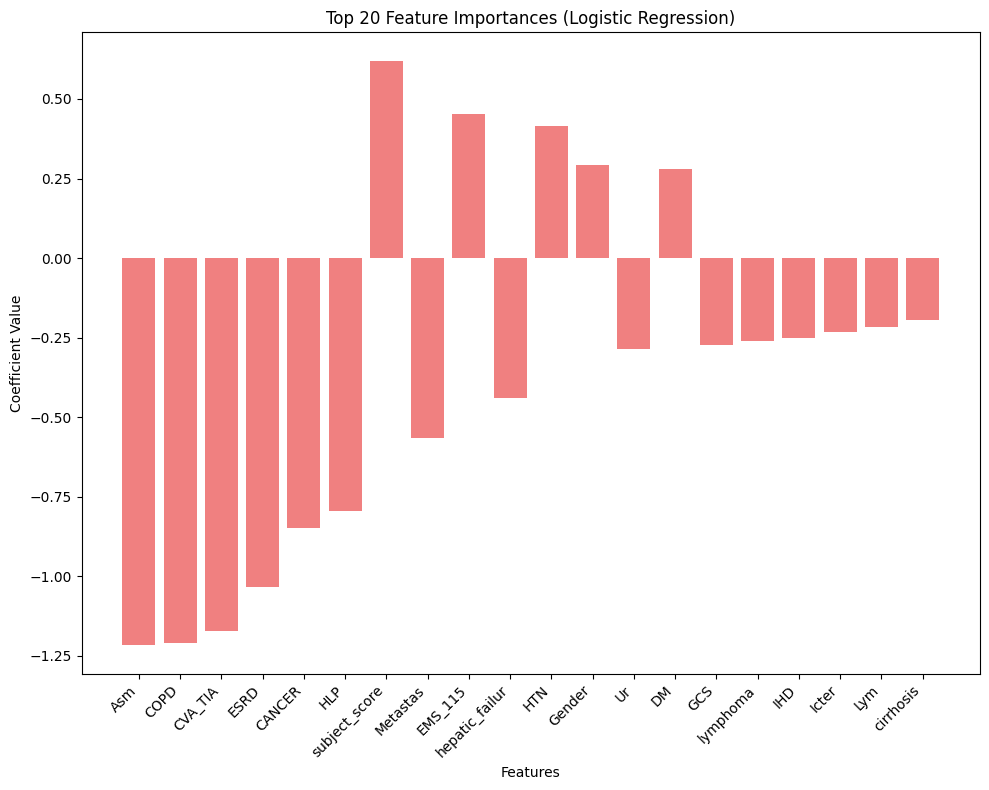

In [ ]:
coefficients_lr = lr_model.coef_[0]
feature_names_lr= X_train.columns

feature_names_lr = np.array(feature_names_lr)


indices = np.argsort(np.abs(coefficients_lr))[-num_features_to_plot:][::-1]


plt.figure(figsize=(10, 8))
plt.bar(range(num_features_to_plot), coefficients_lr[indices], align='center', color='lightcoral')
plt.xticks(range(num_features_to_plot), feature_names_lr[indices], rotation=45, ha='right')
plt.title(f"Top {num_features_to_plot} Feature Importances (Logistic Regression)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(
    class_weight="balanced",
    max_depth=7,
    max_features="sqrt",
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

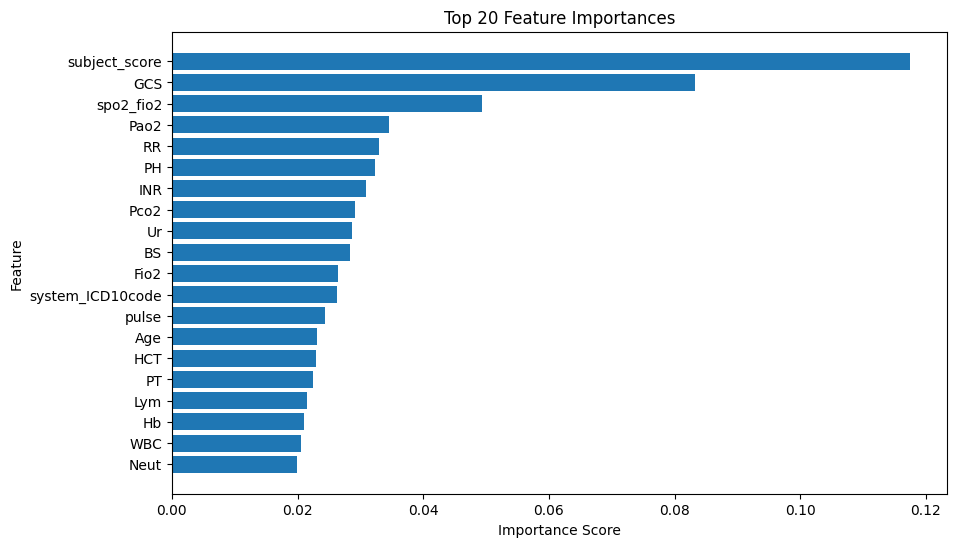

In [ ]:
feature_importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:num_features_to_plot], importance_df['Importance'][:num_features_to_plot], align='center')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title(f'Top {num_features_to_plot} Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
top_features_lr = set(feature_names_lr[np.argsort(np.abs(coefficients_lr))[-num_features_to_plot:]])

top_features_rf = set(importance_df['Feature'][:num_features_to_plot])

common_features = top_features_lr.intersection(top_features_rf)



print(f"Common features selected by both models (Top {num_features_to_plot}):")
print(common_features)

Common features selected by both models (Top 20):
{'GCS', 'Ur', 'Lym', 'subject_score'}


In [ ]:
X_train = X_train[list(common_features)]
X_test = X_test[list(common_features)]

## Logistic Regression

### Model Description:


Logistic regression is a supervised machine learning algorithm commonly used for classification tasks. Despite its name, Logistic Regression is not a regression algorithm but rather a classification model that predicts discrete outcomes, such as binary (e.g., yes/no, 0/1) or multiclass categories.

**How it works:**<br>
Logistic Regression models the relationship between a set of independent variables (features) and a dependent variable (target) using a logistic function (also known as the sigmoid function).
Instead of predicting continuous values like linear regression, Logistic Regression outputs probabilities between 0 and 1, which can be mapped to classes.

**Paramater Explaination:**

**multi_class='multinomial'**: <br>
Specifies how to handle multiclass problems in logistic regression.<br>

'multinomial': Fits a true multinomial model, considering all classes simultaneously. This is the most appropriate choice for multiclass classification tasks when using the lbfgs solver. <br> <br>



**solver='lbfgs'**:<br>
Determines the optimization algorithm used to minimize the loss function.<br>
'lbfgs': A robust solver based on the Limited-memory Broyden-Fletcher-Goldfarb-Shanno algorithm, suitable for multiclass problems and large datasets. <br> <br>


**random_state=42**:<br>
Sets a seed for the random number generator to ensure reproducibility of results.
Using the same random_state will produce the same results across multiple runs.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
lr_model.fit(X_train, y_train)
importances = lr_model.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Logistic regression training and testing

The following code evaluates the performance of a trained Logistic Regression model on both the test dataset and the training dataset using common classification metrics.

**Test Performance:**

Accuracy: The model achieves a test accuracy of 59.92%, indicating moderate generalization to unseen data but room for improvement.<br>
Class-Level Metrics:<br>
Class 0: <br>


*   Precision (62%): Out of all predictions made for Class 0, 62% were correct. This indicates a good balance between false positives and true positives.
<br>
*   Recall (73%): Out of all actual instances of Class 0, the model correctly identified 73%. This high recall indicates the model is effective at detecting Class 0.
<br>
*   F1-Score (67%): The harmonic mean of precision and recall is strong, reflecting good performance for Class 0.






<br>
Class 1: <br>



*   Precision (43%): Out of all predictions made for Class 1, only 43% were correct, showing a high rate of false positives.
<br>
*   Recall (31%): Out of all actual instances of Class 1, only 31% were correctly identified, showing the model struggles significantly with detecting Class 1.
<br>
*   F1-Score (36%): The low F1-score indicates poor overall performance for Class 1, likely due to class imbalance or insufficient feature differentiation.



<br>

Class 2: <br>

*   Precision (61%): Out of all predictions made for Class 2, 61% were correct, showing a moderate balance between false positives and true positives.
<br>
*   Recall (66%): Out of all actual instances of Class 2, the model correctly identified 66%, showing reasonable effectiveness in detecting Class 2.
<br>
*   F1-Score (63%): The model performs moderately well for Class 2, with a balanced trade-off between precision and recall.

<br>

Macro and Weighted Averages:
*   Precision (55%): On average, the model is moderately precise across all classes, but Class 1 significantly pulls down the overall precision.
<br>
*  Recall (56%): The average recall across classes is slightly higher but still moderate, with Class 1 dragging the overall performance down.
<br>
*  F1-Score (54%): The macro F1-score reflects that the model performs best for Class 0, moderately for Class 2, and poorly for Class 1.

<br>

**Training Performance**:<br>
Accuracy: The model achieves a training accuracy of 56.47%, slightly lower than the test accuracy, suggesting a balanced fit without significant overfitting.<br>
Class-Level Metrics:
Class 0: <br>
*   Precision (66%): Good precision, meaning most predictions for Class 0 were correct.
<br>
*  Recall (77%): The model effectively detects Class 0 in the training set.
<br>
*   F1-Score (71%): Reflects strong overall performance for Class 0 in training.

<br>
Class 1:<br>

*  Precision (46%): Low precision, indicating a significant number of false positives.
<br>
*  Recall (37%): The model struggles to detect instances of Class 1, with low recall.
<br>
*   F1-Score (41%): Poor performance overall for Class 1, consistent with the test results.

<br>

Class 2: <br>

*  Precision (54%): Moderate precision for Class 2 predictions.
<br>
*  Recall (60%): The model is reasonably effective at detecting Class 2 in the training data.
<br>
*   F1-Score (57%): Moderate performance overall for Class 2.

<br>

Macro Averages: <br>

*  Precision (55%): The model is moderately precise across classes in training.
<br>
*  Recall (58%): Average recall reflects moderate detection ability, especially for Classes 0 and 2.
<br>
*   F1-Score (56%): Indicates overall moderate performance across all classes, with Class 1 continuing to be the weakest.

<br><br>



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = lr_model.predict(X_test)


print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

y_pred = lr_model.predict(X_train)

print(f"Training Accuracy: {accuracy_score(y_train, y_pred)}")
print(f"Classification Report: {classification_report(y_train, y_pred)}")

Test Accuracy: 0.506578947368421
Classification Report:               precision    recall  f1-score   support

           0       0.57      0.69      0.62       197
           1       0.38      0.19      0.25       210
           2       0.50      0.66      0.57       201

    accuracy                           0.51       608
   macro avg       0.48      0.51      0.48       608
weighted avg       0.48      0.51      0.48       608

Training Accuracy: 0.5280065897858319
Classification Report:               precision    recall  f1-score   support

           0       0.60      0.66      0.63       815
           1       0.43      0.23      0.30       802
           2       0.51      0.69      0.59       811

    accuracy                           0.53      2428
   macro avg       0.51      0.53      0.50      2428
weighted avg       0.51      0.53      0.51      2428



### Confusion matrix
The following code visualizes the confusion matrix for both the test and training datasets. A confusion matrix provides a detailed view of the model's classification performance, highlighting correct and incorrect predictions for each class.



<Figure size 800x600 with 0 Axes>

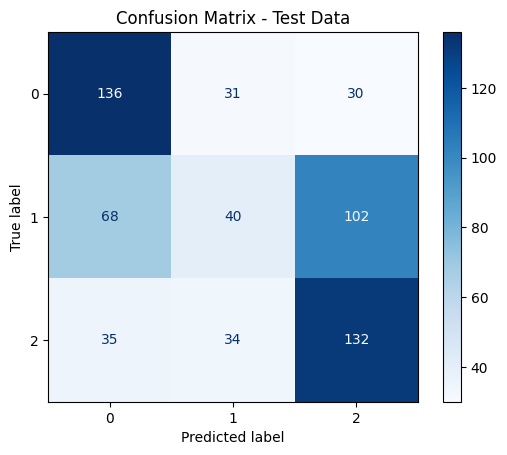

<Figure size 800x600 with 0 Axes>

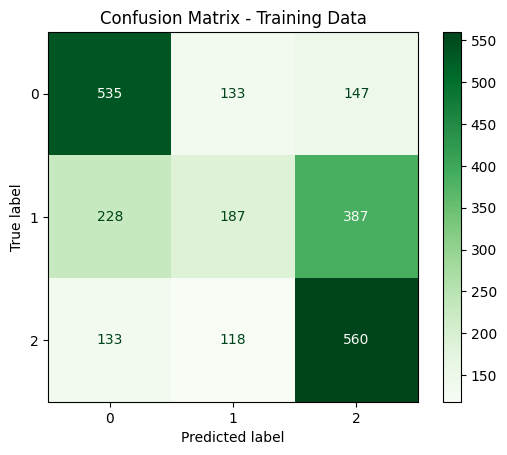

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = lr_model.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr_model.classes_)

plt.figure(figsize=(8, 6))
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Test Data')
plt.show()

y_pred_train = lr_model.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train, labels=lr_model.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=lr_model.classes_)

plt.figure(figsize=(8, 6))
disp_train.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix - Training Data')
plt.show()

### Multi class AUC
The provided code calculates and visualizes the ROC curves (Receiver Operating Characteristic) and computes the AUC (Area Under the Curve) for a multi-class classification problem using Logistic Regression.





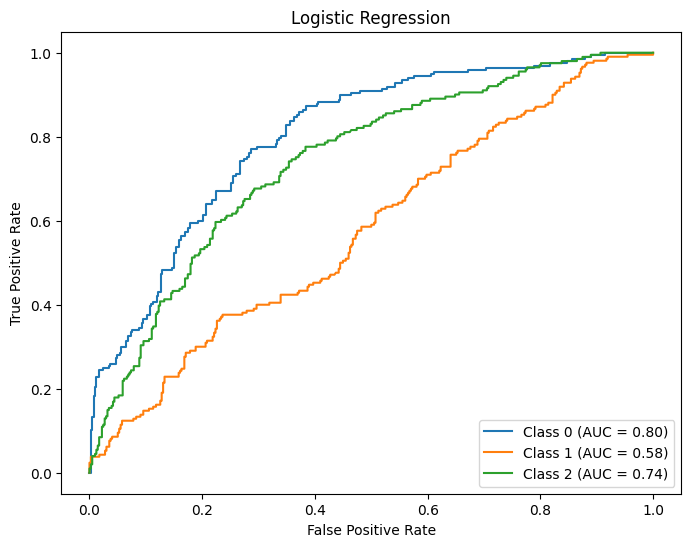



Macro-Average AUC for Logistic Regression: 0.71


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

y_lr_proba = lr_model.predict_proba(X_test)
n_classes = len(set(y_test))
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))

fpr_lr, tpr_lr, roc_auc_lr = {}, {}, {}
for i in range(n_classes):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test_bin[:, i], y_lr_proba[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_lr[i], tpr_lr[i], label=f"Class {i} (AUC = {roc_auc_lr[i]:.2f})")
plt.title("Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

print("\n")
roc_auc_macro_lr = roc_auc_score(y_test_bin, y_lr_proba, average="macro")
print(f"Macro-Average AUC for Logistic Regression: {roc_auc_macro_lr:.2f}")


### Summary of Logistic regression


The model performs best on Class 0, with high precision, recall, and F1-scores in both the training and test datasets, suggesting that the features for Class 0 are well-separated and easily identifiable. In contrast, the model struggles significantly with Class 1, which exhibits low precision and recall, likely due to overlapping features with other classes or an imbalance in the dataset. For Class 2, the model achieves moderate performance, with balanced precision and recall indicating distinguishable but not perfectly separable features. Overall, the consistency between training and test results indicates that the model is neither overfitting nor underfitting, but improving performance for Class 1 should be a priority.

## Support Vector Machines (SVM)

### Model Description:


Support Vector Machine (SVM) with an RBF (Radial Basis Function) kernel is a supervised machine learning algorithm widely used for classification tasks. SVMs are particularly effective in high-dimensional spaces and are known for their robustness in handling non-linear data.

**How it works:** <BR>
SVM works by finding the hyperplane that best separates the data into classes. The RBF kernel transforms the input features into a higher-dimensional space where a hyperplane can separate the classes effectively, making it suitable for non-linear classification tasks.

**Paramater Explaination:**<br>

**kernel='rbf'**: <br>
Specifies the kernel type to be used in the algorithm.<br>


*   'rbf' (Radial Basis Function): A non-linear kernel that maps features into a higher-dimensional space, allowing for the classification of non-linearly separable data.



**decision_function_shape='ovr'**: <br>
 Determines the strategy for multiclass classification. <br>

 *   'ovr' (One-vs-Rest): Fits one classifier per class, distinguishing that class from all other classes.

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42, decision_function_shape='ovr')
svm_model.fit(X_train, y_train)


SVC(random_state=42)

### Support Vector Machines  training and testing

The following code evaluates the performance of a trained Support Vector Machine (SVM) model on both the test dataset and the training dataset using common classification metrics.

**Test Performance:**

Accuracy: The model achieves a test accuracy of 66.77%, indicating moderate generalization to unseen data and better performance compared to Logistic Regression.<br>
Class-Level Metrics:<br>
Class 0: <br>


*   Precision (75%): Out of all predictions made for Class 0, 75% were correct, showing a good balance between false positives and true positives.
<br>
*   Recall (88%): The model successfully identified 88% of actual instances of Class 0, indicating strong performance in detecting Class 0.
<br>
*  F1-Score (81%): The harmonic mean of precision and recall reflects strong overall performance for Class 0.






<br>
Class 1: <br>



*   Precision (61%): Out of all predictions made for Class 1, 61% were correct, indicating a moderate rate of false positives.
<br>
*   Recall (49%): The model correctly identified 49% of actual instances of Class 1, showing room for improvement in detecting this class.
<br>
*  F1-Score (54%): Moderate performance overall for Class 1, though better than Logistic Regression.


<br>

Class 2: <br>

*   Precision (62%): Out of all predictions made for Class 2, 62% were correct, indicating a balance between false positives and true positives.
<br>
*  Recall (65%): The model successfully identified 65% of actual instances of Class 2, showing reasonable effectiveness.
<br>
*  F1-Score (63%): Reflects moderate performance for Class 2, with a good balance between precision and recall.

<br>

Macro and Weighted Averages:
*   Precision (66%): On average, the model demonstrates moderate precision across all classes.
<br>
*  Recall (67%): The average recall across all classes indicates the model is effective at detecting most instances correctly.
<br>
*  F1-Score (66%): Balanced overall performance across all classes.

<br>

**Training Performance**:<br>
Accuracy: The model achieves a training accuracy of 76.81%, which is higher than the test accuracy, suggesting potential overfitting.<br>
Class-Level Metrics:
Class 0: <br>
*   Precision (84%): High precision, meaning most predictions for Class 0 were correct.
<br>
*  Recall (92%): The model effectively identifies almost all instances of Class 0 in the training set.
<br>
*   F1-Score (88%): Reflects strong overall performance for Class 0 in training.

<br>
Class 1:<br>

*  Precision (70%): Good precision for Class 1 predictions.
<br>
*  Recall (56%): Moderate recall indicates some instances of Class 1 are missed.
<br>
*   F1-Score (62%): Reflects reasonable but not optimal performance for Class 1 in training.

<br>

Class 2: <br>

*  Precision (74%): High precision for Class 2 predictions.
<br>
*  Recall (65%): Indicates the model successfully identifies most instances of Class 2 in the training set.
<br>
*   F1-Score (69%): Reflects strong overall performance for Class 2.

<br>

Macro Averages: <br>

*  Precision (77%): The model demonstrates strong precision across all classes in training.
<br>
*  Recall (77%): High recall across all classes indicates effective detection ability.

<br>
*   F1-Score (76%): Indicates overall strong performance, though slightly higher than test results, suggesting potential overfitting.


In [ ]:
y_pred = svm_model.predict(X_test)


print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

y_pred = svm_model.predict(X_train)

print(f"Training Accuracy: {accuracy_score(y_train, y_pred)}")
print(f"Classification Report: {classification_report(y_train, y_pred)}")



Test Accuracy: 0.5411184210526315
Classification Report:               precision    recall  f1-score   support

           0       0.61      0.74      0.67       197
           1       0.43      0.29      0.35       210
           2       0.54      0.61      0.57       201

    accuracy                           0.54       608
   macro avg       0.53      0.55      0.53       608
weighted avg       0.52      0.54      0.53       608

Training Accuracy: 0.5663097199341022
Classification Report:               precision    recall  f1-score   support

           0       0.61      0.72      0.66       815
           1       0.49      0.31      0.38       802
           2       0.56      0.66      0.61       811

    accuracy                           0.57      2428
   macro avg       0.55      0.57      0.55      2428
weighted avg       0.55      0.57      0.55      2428



### Confusion matrix
The following code visualizes the confusion matrix for both the test and training datasets. A confusion matrix provides a detailed view of the model's classification performance, highlighting correct and incorrect predictions for each class.



<Figure size 800x600 with 0 Axes>

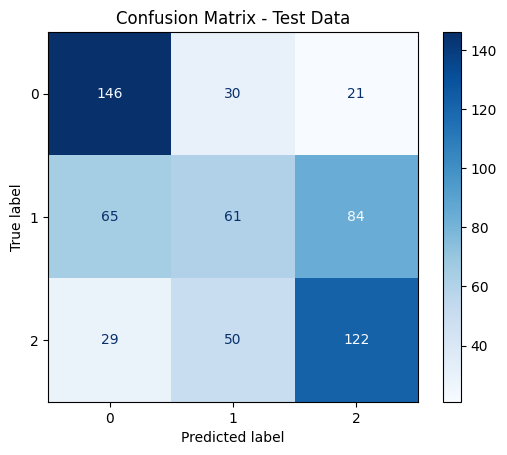

<Figure size 800x600 with 0 Axes>

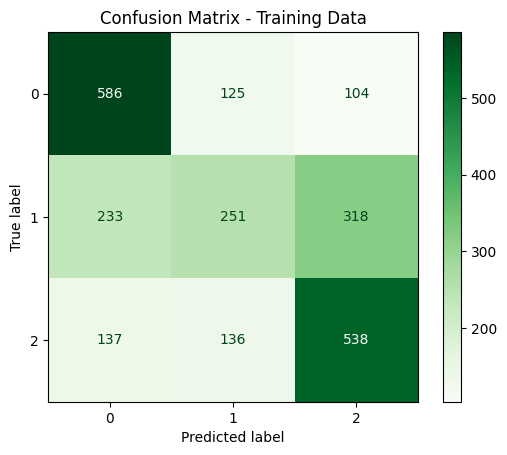

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

y_pred_test = svm_model.predict(X_test)


cm_test = confusion_matrix(y_test, y_pred_test, labels=svm_model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=svm_model.classes_)

plt.figure(figsize=(8, 6))
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Test Data')
plt.show()

y_pred_train = svm_model.predict(X_train)



cm_train = confusion_matrix(y_train, y_pred_train, labels=svm_model.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=svm_model.classes_)

plt.figure(figsize=(8, 6))
disp_train.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix - Training Data')
plt.show()


### Multi class AUC
The provided code calculates and visualizes the ROC curves (Receiver Operating Characteristic) and computes the AUC (Area Under the Curve) for a multi-class classification problem using Logistic Regression.





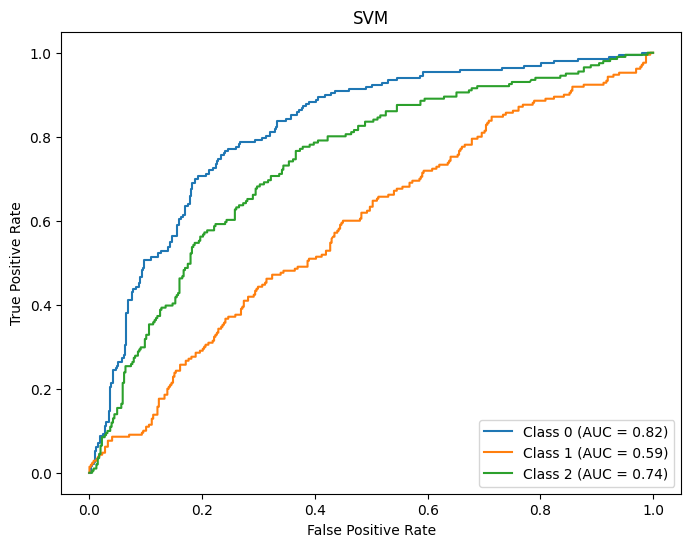



Macro-Average AUC for SVM: 0.71


In [ ]:
y_svm_proba = svm_model.decision_function(X_test)

fpr_svm, tpr_svm, roc_auc_svm = {}, {}, {}
for i in range(n_classes):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_bin[:, i], y_svm_proba[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_svm[i], tpr_svm[i], label=f"Class {i} (AUC = {roc_auc_svm[i]:.2f})")
plt.title("SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

print("\n")
roc_auc_macro_svm = roc_auc_score(y_test_bin, y_svm_proba, average="macro")
print(f"Macro-Average AUC for SVM: {roc_auc_macro_svm:.2f}")


### Summary of SVM



The SVM model with an RBF kernel performs best on Class 0, achieving high precision, recall, and F1-scores in both training and test datasets, indicating that the features for Class 0 are well-separated and easily identifiable. The model performs moderately on Class 2, with balanced precision and recall. However, it struggles with Class 1, which exhibits moderate precision and low recall, suggesting challenges in distinguishing it from other classes. While the training accuracy (76.81%) is notably higher than the test accuracy (66.77%), suggesting slight overfitting, the overall performance shows improvement compared to Logistic Regression. Further improvements can focus on better handling Class 1, possibly through feature engineering or hyperparameter tuning.

## Gaussian Naive Bayes

### Model Description:


Gaussian Naive Bayes (GaussianNB) is a probabilistic machine learning algorithm based on Bayes' theorem. It assumes that the features follow a Gaussian (normal) distribution and are conditionally independent given the class labels. It is widely used for classification tasks due to its simplicity and efficiency, especially for small datasets.

**How it works:**<br>
Gaussian Naive Bayes computes the conditional probability of each class given the features and predicts the class with the highest posterior probability. It calculates the likelihood of the features for each class using the Gaussian probability density function, which makes it suitable for continuous data.


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

### Gaussian naive bayes training and testing

The following code evaluates the performance of a trained Guassian Naive Bayes (GuassianNB) model on both the test dataset and the training dataset using common classification metrics.

**Test Performance:**

Accuracy: The model achieves a test accuracy of 53.43%, indicating that it struggles to generalize effectively to unseen data.<br>
Class-Level Metrics:<br>
Class 0: <br>


*   Precision (65%): Out of all predictions made for Class 0, 65% were correct.
<br>
*   Recall (66%): The model successfully identified 66% of actual instances of Class 0.

<br>
*  F1-Score (66%): The harmonic mean of precision and recall reflects reasonable performance for Class 0.







<br>
Class 1: <br>



*  Precision (45%): Out of all predictions made for Class 1, 45% were correct, indicating a high rate of false positives.

<br>
*   Recall (39%): The model correctly identified only 39% of actual instances of Class 1.

<br>
*  F1-Score (42%): The low F1-score indicates poor performance for Class 1, highlighting significant room for improvement.



<br>

Class 2: <br>

*   Precision (50%): Out of all predictions made for Class 2, 50% were correct.

<br>
*  Recall (54%): The model identified 54% of actual instances of Class 2.

<br>
*  F1-Score (52%): Moderate performance for Class 2, though still suboptimal.


<br>

Macro and Weighted Averages:
*   Precision (53%): On average, the model demonstrates moderate precision across all classes.

<br>
*  Recall (54%): The average recall across all classes indicates the model struggles to detect instances correctly.

<br>
*  F1-Score (53%): Balanced overall performance across all classes, though relatively weak.


<br>

**Training Performance**:<br>
Accuracy: The model achieves a training accuracy of 54.86%, which is close to the test accuracy, suggesting that the model is not overfitting but has limited capacity to learn from the data effectively.<br>
Class-Level Metrics:
Class 0: <br>
*   Precision (66%): High precision, meaning most predictions for Class 0 were correct.

<br>
*  Recall (67%): The model effectively identifies most instances of Class 0 in the training set.

<br>
*   F1-Score (67%): Reflects strong overall performance for Class 0 in training.


<br>
Class 1:<br>

*  Precision (47%): Low precision, indicating a high rate of false positives.

<br>
*  Recall (38%): Moderate recall indicates some instances of Class 1 are missed.

<br>
*   F1-Score (42%): Reflects poor performance for Class 1, consistent with the test results.


<br>

Class 2: <br>

*  Precision (50%): Moderate precision for Class 2 predictions.

<br>
*  Recall (57%): Indicates the model successfully identifies some instances of Class 2 in the training set.

<br>
*   F1-Score (53%): Reflects moderate overall performance for Class 2.


<br>

Macro Averages: <br>

*  Precision (54%): The model demonstrates moderate precision across classes in training.

<br>
*  Recall (55%): Average recall reflects moderate detection ability, especially for Classes 0 and 2.


<br>
*   F1-Score (55%): Indicates overall moderate performance, though Class 1 remains the weakest.



In [ ]:
y_pred = nb_model.predict(X_test)


print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

y_pred = nb_model.predict(X_train)

print(f"Training Accuracy: {accuracy_score(y_train, y_pred)}")
print(f"Classification Report: {classification_report(y_train, y_pred)}")

Test Accuracy: 0.4917763157894737
Classification Report:               precision    recall  f1-score   support

           0       0.59      0.62      0.61       197
           1       0.40      0.16      0.23       210
           2       0.45      0.72      0.55       201

    accuracy                           0.49       608
   macro avg       0.48      0.50      0.46       608
weighted avg       0.48      0.49      0.46       608

Training Accuracy: 0.5078253706754531
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.60      0.61       815
           1       0.43      0.17      0.24       802
           2       0.46      0.75      0.57       811

    accuracy                           0.51      2428
   macro avg       0.50      0.51      0.47      2428
weighted avg       0.50      0.51      0.47      2428



### Confusion matrix
The following code visualizes the confusion matrix for both the test and training datasets. A confusion matrix provides a detailed view of the model's classification performance, highlighting correct and incorrect predictions for each class.



<Figure size 800x600 with 0 Axes>

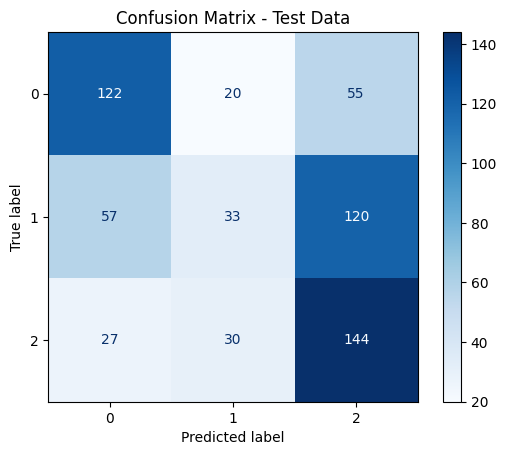

<Figure size 800x600 with 0 Axes>

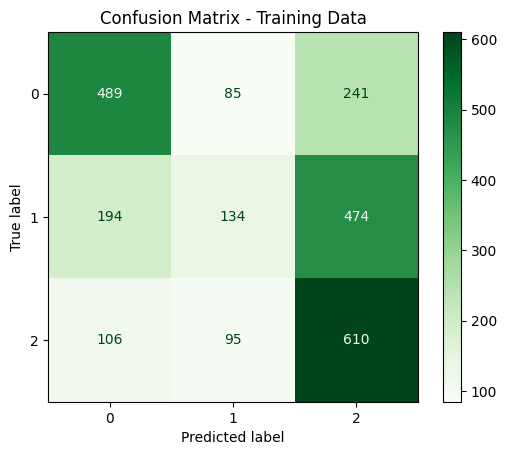

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

y_pred_test = nb_model.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test, labels=nb_model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=nb_model.classes_)

plt.figure(figsize=(8, 6))
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Test Data')
plt.show()

y_pred_train = nb_model.predict(X_train)



cm_train = confusion_matrix(y_train, y_pred_train, labels=nb_model.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=nb_model.classes_)

plt.figure(figsize=(8, 6))
disp_train.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix - Training Data')
plt.show()


### Multi class AUC
The provided code calculates and visualizes the ROC curves (Receiver Operating Characteristic) and computes the AUC (Area Under the Curve) for a multi-class classification problem using Logistic Regression.





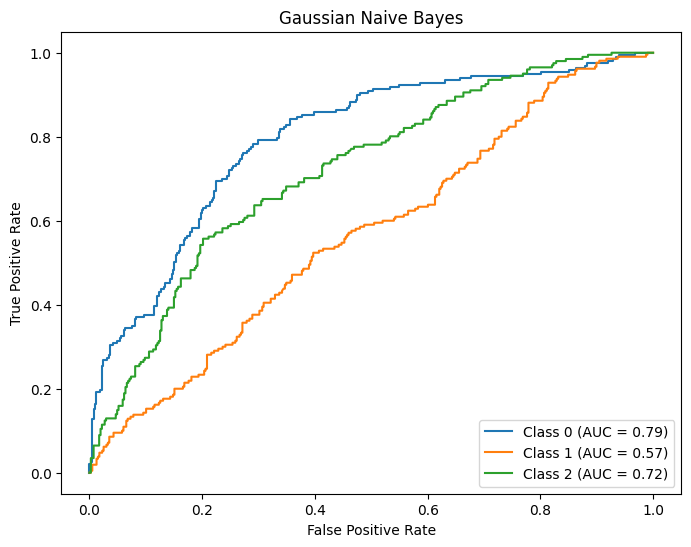



Macro-Average AUC for Naive Bayes: 0.69


In [ ]:
y_nb_proba = nb_model.predict_proba(X_test)

fpr_nb, tpr_nb, roc_auc_nb = {}, {}, {}
for i in range(n_classes):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_bin[:, i], y_nb_proba[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_nb[i], tpr_nb[i], label=f"Class {i} (AUC = {roc_auc_nb[i]:.2f})")
plt.title("Gaussian Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

print("\n")
roc_auc_macro_nb = roc_auc_score(y_test_bin, y_nb_proba, average="macro")
print(f"Macro-Average AUC for Naive Bayes: {roc_auc_macro_nb:.2f}")


### Summary of Gaussian naive bayes


The GaussianNB model performs reasonably well on Class 0, achieving high precision, recall, and F1-scores in both training and test datasets, suggesting that the features for Class 0 are relatively well-separated. The model performs moderately on Class 2, but it struggles significantly with Class 1, which exhibits low precision and recall, indicating challenges in distinguishing it from other classes. The training and test accuracies are similar, showing no signs of overfitting, but the overall performance is limited, reflecting the simplicity of the GaussianNB algorithm. Improving feature engineering or exploring more advanced models may enhance performance.

## Random forest "Chosen model"

### Model Description:


Random Forest is a versatile ensemble learning algorithm used for classification and regression tasks. It builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting. Random Forest handles non-linear data well and can capture complex interactions between features.

 **How it works:**
Random Forest creates several decision trees using random subsets of the training data and features (bootstrap aggregating). Each tree makes a prediction, and the final output is determined by majority voting for classification tasks.

**Paramater Explaination:**

**class_weight='balanced'**: <br>
Automatically adjusts the weights of classes based on their frequency in the training data to handle class imbalance.<br>


*   Reason for Choice: Ensures that underrepresented classes are not ignored by the model.



**max_depth=7**: <br>
 Specifies the maximum depth of the trees.
 <br>

 *   Reason for Choice: Restricts the depth of the trees to prevent overfitting and improve generalization.


 **max_features='sqrt'**: <br>
 Defines the number of features considered when splitting a node.
 <br>

 *   Reason for Choice: Taking the square root of the total number of features is a common heuristic to balance model complexity and performance.

  **n_estimators=100**: <br>
 Determines the number of trees in the forest.
 <br>

 *   Reason for Choice: Provides a good balance between computational efficiency and performance.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(
    class_weight="balanced",
    max_depth=7,
    max_features="sqrt",
    n_estimators=100,
    random_state=42
)


rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, random_state=42)

### Random Forest training and testing

The following code evaluates the performance of a trained Random Forest model on both the test dataset and the training dataset using common classification metrics.

**Test Performance:**

Accuracy: The model achieves a test accuracy of 65.46%, showing moderate generalization to unseen data.<br>
Class-Level Metrics:<br>
Class 0: <br>


*   Precision (74%): Out of all predictions made for Class 0, 74% were correct, showing good precision.
<br>
*   Recall (87%): The model successfully identified 87% of actual instances of Class 0, demonstrating strong detection ability.


<br>
*  F1-Score (80%): The harmonic mean of precision and recall reflects strong overall performance for Class 0.








<br>
Class 1: <br>



*  Precision (58%): Out of all predictions made for Class 1, 58% were correct, indicating a moderate rate of false positives.


<br>
*   Recall (38%): The model correctly identified only 38% of actual instances of Class 1, showing room for improvement.

<br>
*  F1-Score (46%): Moderate performance overall for Class 1, with noticeable room for improvement.




<br>

Class 2: <br>

*   Precision (62%): Out of all predictions made for Class 2, 62% were correct, showing reasonable precision.


<br>
*  Recall (73%): The model successfully identified 73% of actual instances of Class 2, indicating good detection capability.


<br>
*  F1-Score (67%): Balanced overall performance for Class 2, with a good trade-off between precision and recall.



<br>

Macro and Weighted Averages:
*   Precision (64%): On average, the model demonstrates moderate precision across all classes.


<br>
*  Recall (66%): The average recall indicates effective detection of most instances.


<br>
*  F1-Score (64%): Balanced performance across all classes, though with room for improvement, particularly for Class 1.



<br>

**Training Performance**:<br>
Accuracy: The model achieves a training accuracy of 83.19%, which is significantly higher than the test accuracy, suggesting potential overfitting.<br>
Class-Level Metrics:
Class 0: <br>
*   Precision (87%): High precision, meaning most predictions for Class 0 were correct.


<br>
*  Recall (94%): The model effectively identifies almost all instances of Class 0 in the training set.


<br>
*   F1-Score (90%): Reflects strong overall performance for Class 0 in training.


<br>
Class 1:<br>

*  Precision (70%): Good precision for Class 1 predictions.

<br>
*  Recall (67%): The model identifies most instances of Class 1 in the training set.


<br>
*   F1-Score (67%): Reflects reasonable overall performance for Class 1 in training.



<br>

Class 2: <br>

*  Precision (75%): High precision for Class 2 predictions.


<br>
*  Recall (89%): The model effectively identifies most instances of Class 2 in the training set.


<br>
*   F1-Score (81%): Reflects strong overall performance for Class 2 in training.



<br>

Macro Averages: <br>

*  Precision (84%): High precision across all classes in training.


<br>
*  Recall (83%): High recall across all classes indicates effective detection ability.



<br>
*   F1-Score (83%): Strong overall performance, though the gap between training and test performance suggests potential overfitting.


In [ ]:
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Classification Report (Test):\n{classification_report(y_test, y_pred_test)}\n")
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Classification Report (Train):\n{classification_report(y_train, y_pred_train)}")

Test Accuracy: 0.6101973684210527
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       197
           1       0.53      0.35      0.42       210
           2       0.59      0.67      0.62       201

    accuracy                           0.61       608
   macro avg       0.60      0.62      0.60       608
weighted avg       0.60      0.61      0.59       608


Training Accuracy: 0.7228171334431631
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       815
           1       0.70      0.51      0.59       802
           2       0.68      0.79      0.73       811

    accuracy                           0.72      2428
   macro avg       0.72      0.72      0.71      2428
weighted avg       0.72      0.72      0.71      2428



### Confusion matrix
The following code visualizes the confusion matrix for both the test and training datasets. A confusion matrix provides a detailed view of the model's classification performance, highlighting correct and incorrect predictions for each class.



<Figure size 800x600 with 0 Axes>

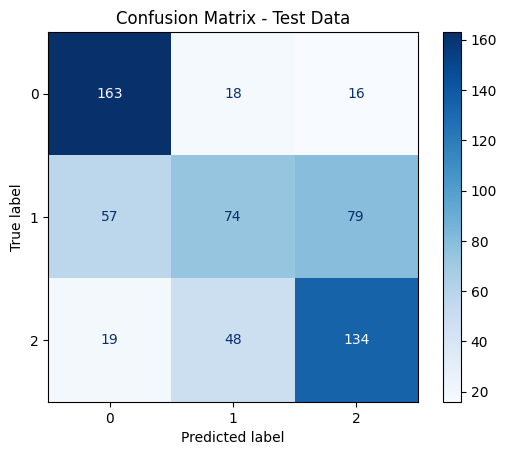

<Figure size 800x600 with 0 Axes>

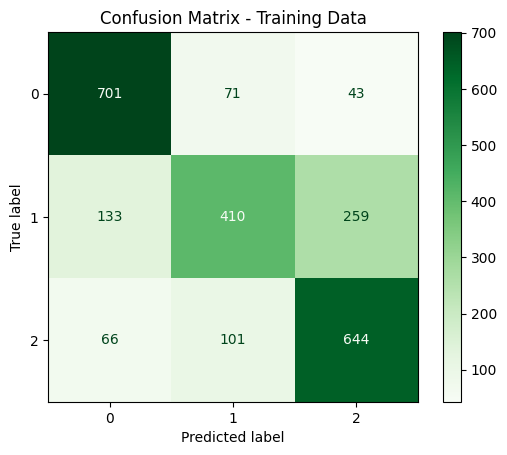

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

y_pred_test = rf_model.predict(X_test)



cm_test = confusion_matrix(y_test, y_pred_test, labels=rf_model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model.classes_)

plt.figure(figsize=(8, 6))
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Test Data')
plt.show()

y_pred_train = rf_model.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train, labels=rf_model.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rf_model.classes_)

plt.figure(figsize=(8, 6))
disp_train.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix - Training Data')
plt.show()


### Multi class AUC
The provided code calculates and visualizes the ROC curves (Receiver Operating Characteristic) and computes the AUC (Area Under the Curve) for a multi-class classification problem using Logistic Regression.





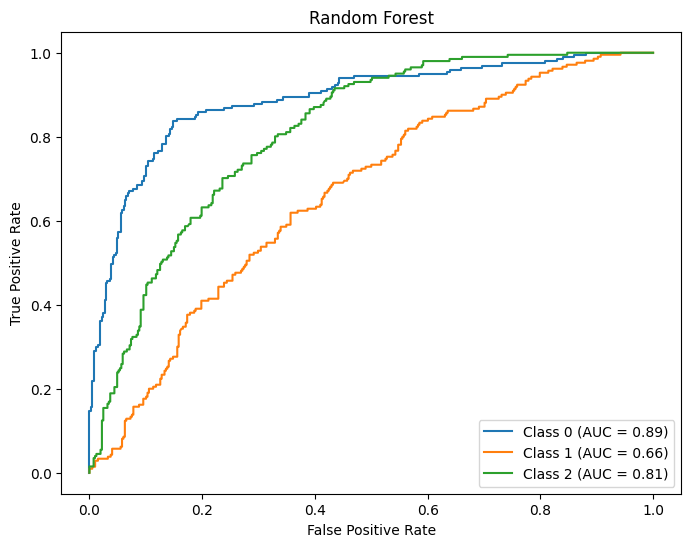



Macro-Average AUC for Random Forest: 0.79


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

y_rf_proba = rf_model.predict_proba(X_test)

n_classes = len(set(y_test))
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))

fpr_rf, tpr_rf, roc_auc_rf = {}, {}, {}
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_rf_proba[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f"Class {i} (AUC = {roc_auc_rf[i]:.2f})")
plt.title("Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

print("\n")
roc_auc_macro_rf = roc_auc_score(y_test_bin, y_rf_proba, average="macro")
print(f"Macro-Average AUC for Random Forest: {roc_auc_macro_rf:.2f}")


### Summary of Random Forest


The Random Forest model performs best on Class 0, achieving high precision, recall, and F1-scores in both training and test datasets, indicating that the features for Class 0 are well-separated and easily identifiable. It performs moderately on Class 2, with balanced precision and recall. However, the model struggles with Class 1, which exhibits moderate precision and low recall, suggesting challenges in distinguishing it from other classes. The higher training accuracy (83.19%) compared to the test accuracy (65.46%) indicates potential overfitting, which could be addressed by further tuning hyperparameters or using regularization techniques. Overall, Random Forest demonstrates robust performance, particularly for well-separated classes, but improvements for Class 1 and generalization are needed.

# Conclusion
In this section, we will highlight the overall findings, successes, limitations, and future directions of the project, summarizing the key takeaways and their implications for the intended application.




## Key Findings and Their Implications




**Data Insights:**

The dataset had many **outliers**, which we fixed using different methods:

*     Z-scores

*     capping extreme values.

The dataset had also a **missing value**s, which we fixed using different methods:

*     Dropping.

*     Imputation.

Also, we convert categorical data for better analysis and used techniques like SMOTENC to balance unequal class distributions.<br>

**Hypotheses Testing**:

Statistical tests showed meaningful relationships, such as how age impacts survival, adding credibility to the model.
Implications: This project shows how machine learning can help automate critical processes like medical triage. By identifying high-risk patients more accurately, it can improve how resources are allocated, reduce human error, and potentially save lives.


**Model Performance**:

Among the models tested (Logistic Regression, SVM, Naive Bayes, and Random Forest),<br> Random Forest performed the best.
Random Forest provided accurate and reliable predictions, especially when comparing with other models.<br>

**Feature Importance**:

We identified the most important features influencing predictions within each model like logistic regression coefficients and Random Forest rankings.
These findings help explain the model’s decisions and align with what we expect based on medical knowledge.

**Changes made based on feedback**:<br>
The feedback pointed out the lack of a dedicated section for feature engineering. We clarified that feature engineering was discussed within relevant sections, such as data preprocessing and model preparation, where scaling, standardization, and encoding were explained as part of ensuring the dataset was ready for analysis and model development. This approach integrated feature engineering naturally into the workflow.


#### Project Reflection

Overall Success: The project successfully achieved its goal of finding a raw dataset to work on. Highlights include:

*   Preparing a clean dataset.
*   Testing multiple models and selecting the best one.
*   Gaining insights from the data that align with medical knowledge.
*   Choosing Random Forest as the most suitable model validates the potential for applying machine learning in healthcare.








## Limitation & Future direction




**Limitation and challenges**
*   Data Quality:
The dataset was raw and required extensive cleaning to address inconsistencies, missing values, duplicates, noise, and outliers, which, despite improvements, may have led to the loss of some medically relevant information.
*   Triage Levels:
The dataset included only three triage levels, whereas the current medical standard uses five, limiting its alignment with real-world practices.

**Future direction**


*   Improving Data Quality:
We can further clean and process the data to make it more accurate, such as better handling outliers, filling in missing values, and keeping important medical details. These steps will help make the dataset more realistic and reliable.


*   Aligning Triage Levels:
To match the current five-level triage system, we can create a simple mapping from the existing three levels. This involves working with medical experts to decide how the levels compare, making the model more useful in real-life healthcare environment.


## Final results of all models




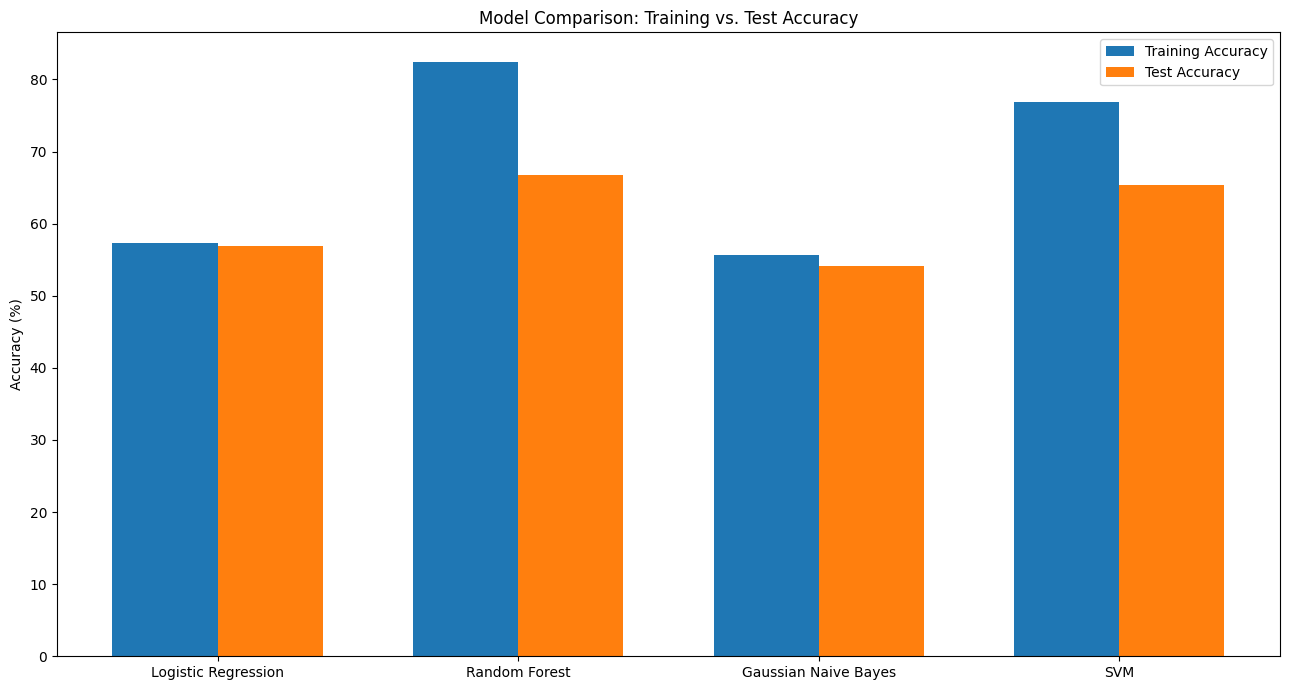

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
training_accuracies = [57.25, 82.41, 55.64, 76.9]
test_accuracies = [56.91, 66.78, 54.11, 65.30]

training_accuracies = np.array(training_accuracies)
test_accuracies = np.array(test_accuracies)

x = np.arange(len(models))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 7))

training_bars = ax.bar(x - bar_width/2, training_accuracies, bar_width, label='Training Accuracy', color='#1f77b4')
test_bars = ax.bar(x + bar_width/2, test_accuracies, bar_width, label='Test Accuracy', color='#ff7f0e')

ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Comparison: Training vs. Test Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, ha='center')
ax.legend()

def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.show()


## Describe the distribution of tasks among team members.



In [3]:
import pandas as pd
from IPython.display import display
from tabulate import tabulate

# Data
data = {
    "Name": [
        "Abdulrhman Abdullatif Albusaad",
        "Ali Yousef Assuleiteen",
        "Mahdi Jameel Alzakari",
        "Waeeil Aali Alessa"
    ],

    "Contributions": [
        "Exploratory Data Analysis (EDA)\nHandling missing data and data quality issues\nSupport Vector Machines (SVM)",
        "Exploratory Data Analysis (EDA)\nDealing with different value types\nFeature Engineering\nGaussian Naive Bayes",
        "Exploratory Data Analysis (EDA)\nFeature Engineering\nLogistic Regression",
        "Exploratory Data Analysis (EDA)\nHandling missing data and data quality issues\nHypotheses Formulation\nRandom forest"
    ]
}

df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════════════════════╤═══════════════════════════════════════════════╕
│ Name                           │ Contributions                                 │
╞════════════════════════════════╪═══════════════════════════════════════════════╡
│ Abdulrhman Abdullatif Albusaad │ Exploratory Data Analysis (EDA)               │
│                                │ Handling missing data and data quality issues │
│                                │ Support Vector Machines (SVM)                 │
├────────────────────────────────┼───────────────────────────────────────────────┤
│ Ali Yousef Assuleiteen         │ Exploratory Data Analysis (EDA)               │
│                                │ Dealing with different value types            │
│                                │ Feature Engineering                           │
│                                │ Gaussian Naive Bayes                          │
├────────────────────────────────┼───────────────────────────────────────────────┤
│ Ma